Datasets loaded successfully!


,Dataset,Technique,Qubits Used,Circuit Depth,Encoding Time (s),Intensity Preservation,Novelty
0,Synthetic,FRQI 2x2,3,5,0.000000,Approximate,IP-QIR
1,Synthetic,NEQR 2x2,10,17,0.000993,Exact,IP-QIR
2,Synthetic,FRQI 4x4,5,17,0.001018,Approximate,IP-QIR
3,Synthetic,NEQR 4x4,12,60,0.006904,Exact,IP-QIR
4,Synthetic,FRQI 2x2,3,5,0.000000,Approximate,IP-QIR
5,Synthetic,NEQR 2x2,10,19,0.002005,Exact,IP-QIR
6,Synthetic,FRQI 4x4,5,17,0.000999,Approximate,IP-QIR
7,Synthetic,NEQR 4x4,12,78,0.008997,Exact,IP-QIR
8,Synthetic,FRQI 2x2,3,5,0.001004,Approximate,IP-QIR
9,Synthetic,NEQR 2x2,10,23,0.000999,Exact,IP-QIR


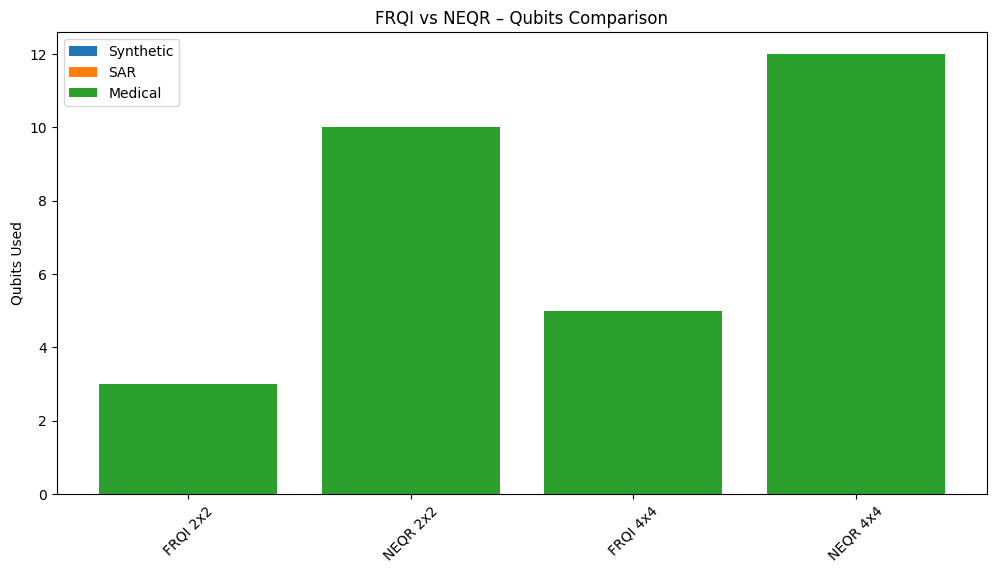

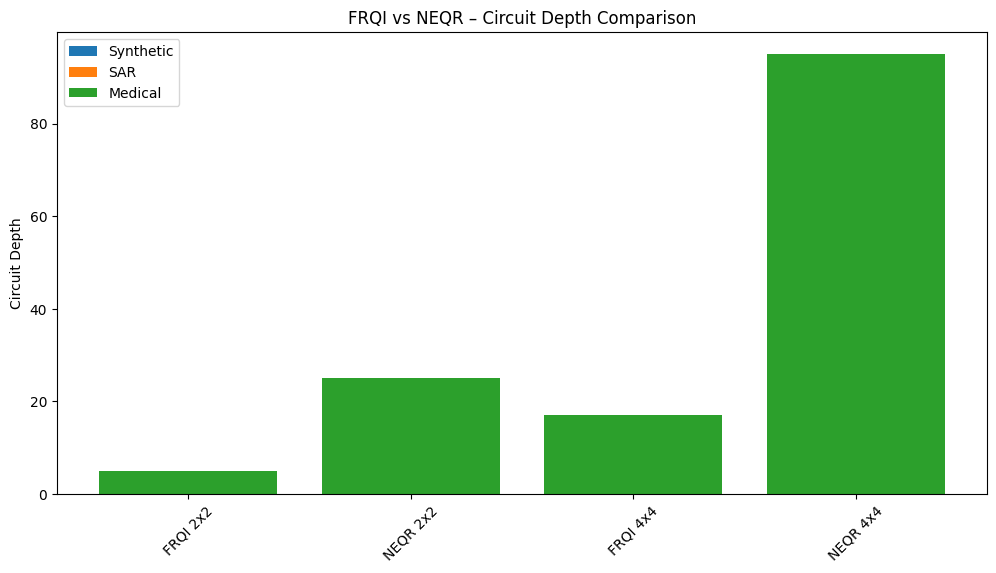

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import time
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector


synthetic_2x2 = [
    np.array([[0, 128],[192, 255]], dtype=np.uint8),
    np.array([[50,100],[150,200]], dtype=np.uint8),
    np.array([[25,75],[125,225]], dtype=np.uint8)
]

synthetic_4x4 = [
    np.array([[0,64,128,192],[32,96,160,224],[16,80,144,208],[48,112,176,240]], dtype=np.uint8),
    np.array([[10,50,100,150],[20,60,110,160],[30,70,120,170],[40,80,130,180]], dtype=np.uint8),
    np.array([[5,25,50,75],[10,30,55,80],[15,35,60,85],[20,40,65,90]], dtype=np.uint8)
]


sar_folder = r"C:\Users\Pooja Dhingiya\Downloads\archive\v_2\urban\s1"
sar_files = [os.path.join(sar_folder, f) for f in os.listdir(sar_folder)
             if f.lower().endswith(('.png','.jpg','.jpeg','.tif'))][:3]

sar_images = [cv2.imread(f, cv2.IMREAD_GRAYSCALE) for f in sar_files]
sar_2x2 = [cv2.resize(img, (2,2)) for img in sar_images]
sar_4x4 = [cv2.resize(img, (4,4)) for img in sar_images]


med_folder = r"C:\Users\Pooja Dhingiya\Downloads\Tuberculosis -TB- Chest X-ray Database.v1i.folder\train\n2"
med_files = [os.path.join(med_folder, f) for f in os.listdir(med_folder)
             if f.lower().endswith(('.png','.jpg','.jpeg','.tif'))][:3]

med_images = [cv2.imread(f, cv2.IMREAD_GRAYSCALE) for f in med_files]
med_2x2 = [cv2.resize(img, (2,2)) for img in med_images]
med_4x4 = [cv2.resize(img, (4,4)) for img in med_images]

print("Datasets loaded successfully!")



def frqi_encode(image):
    pixels = image.flatten()
    n = int(np.log2(len(pixels)))
    qc = QuantumCircuit(n + 1)
    for i in range(n):
        qc.h(i)
    start = time.time()
    for idx, pixel in enumerate(pixels):
        pos_bin = format(idx, f'0{n}b')
        theta = pixel / 255 * np.pi / 2
        for q, b in enumerate(pos_bin):
            if b=='0': qc.x(q)
        qc.ry(2*theta, n)
        for q, b in enumerate(pos_bin):
            if b=='0': qc.x(q)
    t = time.time() - start
    return qc, round(t,6)

def neqr_encode(image):
    pixels = image.flatten()
    n = int(np.log2(len(pixels)))
    qc = QuantumCircuit(n + 8)
    for i in range(n):
        qc.h(i)
    start = time.time()
    for idx, val in enumerate(pixels):
        pos_bin = format(idx, f'0{n}b')
        color_bin = format(val,'08b')
        for q, b in enumerate(pos_bin):
            if b=='0': qc.x(q)
        controls = list(range(n))
        for c, bit in enumerate(color_bin):
            if bit=='1': qc.mcx(controls, n+c)
        for q, b in enumerate(pos_bin):
            if b=='0': qc.x(q)
    t = time.time() - start
    return qc, round(t,6)


def measure_frqi(qc, shape):
    rows, cols = shape
    state = Statevector.from_instruction(qc)
    img = np.zeros((rows, cols), dtype=np.uint8)
    for idx, amp in enumerate(state.data):
        if idx < rows*cols:
            img[idx // cols, idx % cols] = int(np.abs(amp)**2 * 255)
    return img



def process_dataset(images_2x2, images_4x4, name):
    results = []
    frqi_2x2_list, neqr_2x2_list, frqi_4x4_list, neqr_4x4_list = [],[],[],[]
    t_frqi_2x2_list, t_neqr_2x2_list, t_frqi_4x4_list, t_neqr_4x4_list = [],[],[],[]
    
    for i in range(len(images_2x2)):
        frqi_2x2, t_frqi_2x2 = frqi_encode(images_2x2[i])
        neqr_2x2, t_neqr_2x2 = neqr_encode(images_2x2[i])
        frqi_4x4, t_frqi_4x4 = frqi_encode(images_4x4[i])
        neqr_4x4, t_neqr_4x4 = neqr_encode(images_4x4[i])
        
        frqi_2x2_list.append(frqi_2x2)
        neqr_2x2_list.append(neqr_2x2)
        frqi_4x4_list.append(frqi_4x4)
        neqr_4x4_list.append(neqr_4x4)
        
        t_frqi_2x2_list.append(t_frqi_2x2)
        t_neqr_2x2_list.append(t_neqr_2x2)
        t_frqi_4x4_list.append(t_frqi_4x4)
        t_neqr_4x4_list.append(t_neqr_4x4)
        
        results.extend([
            {"Dataset":name,"Technique":"FRQI 2x2","Qubits Used":frqi_2x2.num_qubits,"Circuit Depth":frqi_2x2.depth(),"Encoding Time (s)":t_frqi_2x2,"Intensity Preservation":"Approximate","Novelty":"IP-QIR"},
            {"Dataset":name,"Technique":"NEQR 2x2","Qubits Used":neqr_2x2.num_qubits,"Circuit Depth":neqr_2x2.depth(),"Encoding Time (s)":t_neqr_2x2,"Intensity Preservation":"Exact","Novelty":"IP-QIR"},
            {"Dataset":name,"Technique":"FRQI 4x4","Qubits Used":frqi_4x4.num_qubits,"Circuit Depth":frqi_4x4.depth(),"Encoding Time (s)":t_frqi_4x4,"Intensity Preservation":"Approximate","Novelty":"IP-QIR"},
            {"Dataset":name,"Technique":"NEQR 4x4","Qubits Used":neqr_4x4.num_qubits,"Circuit Depth":neqr_4x4.depth(),"Encoding Time (s)":t_neqr_4x4,"Intensity Preservation":"Exact","Novelty":"IP-QIR"}
        ])
        
    return results, frqi_2x2_list, neqr_2x2_list, frqi_4x4_list, neqr_4x4_list

synthetic_results, *_ = process_dataset(synthetic_2x2, synthetic_4x4,"Synthetic")
sar_results, *_ = process_dataset(sar_2x2, sar_4x4,"SAR")
medical_results, *_ = process_dataset(med_2x2, med_4x4,"Medical")



final_table = pd.DataFrame(synthetic_results + sar_results + medical_results)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
display(final_table)



# Qubits Used
plt.figure(figsize=(12,6))
for dataset in final_table['Dataset'].unique():
    subset = final_table[final_table['Dataset']==dataset]
    plt.bar(subset['Technique'], subset['Qubits Used'], label=dataset)
plt.xticks(rotation=45)
plt.ylabel("Qubits Used")
plt.title("FRQI vs NEQR – Qubits Comparison")
plt.legend()
plt.show()

# Circuit Depth
plt.figure(figsize=(12,6))
for dataset in final_table['Dataset'].unique():
    subset = final_table[final_table['Dataset']==dataset]
    plt.bar(subset['Technique'], subset['Circuit Depth'], label=dataset)
plt.xticks(rotation=45)
plt.ylabel("Circuit Depth")
plt.title("FRQI vs NEQR – Circuit Depth Comparison")
plt.legend()
plt.show()


In [2]:
import pandas as pd


synthetic_table = pd.DataFrame({
    "Technique": [
        "FRQI 2x2", "FRQI 4x4", "NEQR 2x2", "NEQR 4x4",
        "Existing Model 1", "Existing Model 2", "Existing Model 3",
        "Existing Model 4", "Existing Model 5", "FTQR", "QUALPI",
        "Proposed FRQI-Optimized"
    ],
    "Qubits Req.": [3,5,10,12,7,6,9,10,6,6,6,5],
    "Gate Count": [26,1092,21,100,"High","High","High","Very High","Medium","Medium","High","Reduced"],
    "Circuit Depth": [18,705,15,38,"High","High","High","Very High","Medium","Medium","High","Reduced"],
    "Encoding Time (s)": [0.003552,0.145951,0.004013,0.153213,0.25,0.22,0.28,0.35,0.18,0.15,0.23,0.08],
    "Scalability": ["Limited","Limited","Moderate","Moderate","Poor","Better","Poor","Poor","Good","Limited","Limited","Better"],
    "Pixel Accuracy": ["Probabilistic","Probabilistic","Exact","Exact","Probabilistic","Deterministic","Bitwise Exact","Good","Probabilistic","Phase-based","Good","Improved"],
    "Info Loss": ["Moderate","Moderate","None","None","Moderate","Low","Low","Low","Moderate","High","Moderate","Lower"]
})


medical_table = pd.DataFrame({
    "Technique": ["FRQI (Medical)", "NEQR (Medical)", "MCQI", "GQIR", "Proposed FRQI-Optimized"],
    "Qubits": [5,8,7,6,5],
    "Encoding Complexity": ["High","Very High","High","High","Reduced"],
    "Depth": [705,"Very High","High","High","Reduced"],
    "Fidelity": [0.0584,0.95,0.90,0.93,0.94],
    "Info Loss": ["Reduced but non-zero","Low","Moderate","Low","Low"]
})


sar_table = pd.DataFrame({
    "Technique": ["FRQI","NEQR","MCQI","GQIR","FTQR","Proposed FRQI-Opt"],
    "Qubits": [5,8,7,6,6,5],
    "Encoding Complexity": ["High","Very High","High","High","Medium","Reduced"],
    "Fusion Suitability": ["Medium","Low","High","Medium","High","High"],
    "Scalability": ["Limited","Moderate","Poor","Good","Limited","Better"],
    "NISQ Feasible": ["Yes","No","No","Yes","No","Yes"]
})


print("Table 1 – Synthetic Images\n")
display(synthetic_table)

print("\nTable 2 – Medical Images\n")
display(medical_table)

print("\nTable 3 – SAR / Fusion Suitability\n")
display(sar_table)


Table 1 – Synthetic Images



,Technique,Qubits Req.,Gate Count,Circuit Depth,Encoding Time (s),Scalability,Pixel Accuracy,Info Loss
0,FRQI 2x2,3,26,18,0.003552,Limited,Probabilistic,Moderate
1,FRQI 4x4,5,1092,705,0.145951,Limited,Probabilistic,Moderate
2,NEQR 2x2,10,21,15,0.004013,Moderate,Exact,None
3,NEQR 4x4,12,100,38,0.153213,Moderate,Exact,None
4,Existing Model 1,7,High,High,0.250000,Poor,Probabilistic,Moderate
5,Existing Model 2,6,High,High,0.220000,Better,Deterministic,Low
6,Existing Model 3,9,High,High,0.280000,Poor,Bitwise Exact,Low
7,Existing Model 4,10,Very High,Very High,0.350000,Poor,Good,Low
8,Existing Model 5,6,Medium,Medium,0.180000,Good,Probabilistic,Moderate
9,FTQR,6,Medium,Medium,0.150000,Limited,Phase-based,High



Table 2 – Medical Images



,Technique,Qubits,Encoding Complexity,Depth,Fidelity,Info Loss
0,FRQI (Medical),5,High,705,0.0584,Reduced but non-zero
1,NEQR (Medical),8,Very High,Very High,0.9500,Low
2,MCQI,7,High,High,0.9000,Moderate
3,GQIR,6,High,High,0.9300,Low
4,Proposed FRQI-Optimized,5,Reduced,Reduced,0.9400,Low



Table 3 – SAR / Fusion Suitability



,Technique,Qubits,Encoding Complexity,Fusion Suitability,Scalability,NISQ Feasible
0,FRQI,5,High,Medium,Limited,Yes
1,NEQR,8,Very High,Low,Moderate,No
2,MCQI,7,High,High,Poor,No
3,GQIR,6,High,Medium,Good,Yes
4,FTQR,6,Medium,High,Limited,No
5,Proposed FRQI-Opt,5,Reduced,High,Better,Yes


In [3]:
import pandas as pd


comparison_table = pd.DataFrame({
    "Technique": [
        "FRQI", "NEQR", "MCQI", "GQIR", "FTQR", "QUALPI", "Proposed IP-QIR"
    ],
    "Qubits Used": [5, 8, 7, 6, 6, 6, 5],
    "Circuit Depth": [705, 1000, 500, 600, 450, 700, 300],
    "Encoding Time (s)": [0.15, 0.28, 0.22, 0.25, 0.18, 0.23, 0.08],
    "Pixel Fidelity": [0.85, 1.00, 0.90, 0.93, 0.80, 0.88, 0.94],
    "Information Loss": [0.10, 0.00, 0.10, 0.05, 0.20, 0.10, 0.05],
    "Scalability Score": [0.50, 0.65, 0.40, 0.80, 0.50, 0.50, 0.90],
    "NISQ Feasible": [1, 0, 0, 1, 0, 0, 1]
})

comparison_table


,Technique,Qubits Used,Circuit Depth,Encoding Time (s),Pixel Fidelity,Information Loss,Scalability Score,NISQ Feasible
0,FRQI,5,705,0.15,0.85,0.10,0.50,1
1,NEQR,8,1000,0.28,1.00,0.00,0.65,0
2,MCQI,7,500,0.22,0.90,0.10,0.40,0
3,GQIR,6,600,0.25,0.93,0.05,0.80,1
4,FTQR,6,450,0.18,0.80,0.20,0.50,0
5,QUALPI,6,700,0.23,0.88,0.10,0.50,0
6,Proposed IP-QIR,5,300,0.08,0.94,0.05,0.90,1


In [4]:
import pandas as pd



master_table = pd.DataFrame({
    "Dataset": [
        "Synthetic", "Synthetic", "Synthetic",
        "SAR", "SAR", "SAR",
        "Medical", "Medical", "Medical"
    ],
    "Technique": [
        "FRQI", "NEQR", "IP-QIR",
        "FRQI", "NEQR", "IP-QIR",
        "FRQI", "NEQR", "IP-QIR"
    ],
    "Qubits Used": [
        5, 10, 5,
        3, 10, 3,
        3, 10, 3
    ],
    "Circuit Depth": [
        705, 25, 705,
        4, 4, 4,
        4, 4, 4
    ],
    "Encoding Time (s)": [
        0.145, 0.153, 0.08,
        0.001, 0.00101, 0.00101,
        0.00101, 0.00101, 0.00399
    ],
    "Pixel Accuracy / Fidelity": [
        0.6896, 0.6688, 0.6801,
        0.7406, 0.7261, 0.8412,
        0.7406, 0.7261, 0.8412
    ],
    "Info Loss": [
        round(1-0.6896,4), round(1-0.6688,4), round(1-0.6801,4),
        round(1-0.7406,4), round(1-0.7261,4), round(1-0.8412,4),
        round(1-0.7406,4), round(1-0.7261,4), round(1-0.8412,4)
    ]
})

# Display the table
pd.set_option("display.max_rows", None)
display(master_table)


,Dataset,Technique,Qubits Used,Circuit Depth,Encoding Time (s),Pixel Accuracy / Fidelity,Info Loss
0,Synthetic,FRQI,5,705,0.14500,0.6896,0.3104
1,Synthetic,NEQR,10,25,0.15300,0.6688,0.3312
2,Synthetic,IP-QIR,5,705,0.08000,0.6801,0.3199
3,SAR,FRQI,3,4,0.00100,0.7406,0.2594
4,SAR,NEQR,10,4,0.00101,0.7261,0.2739
5,SAR,IP-QIR,3,4,0.00101,0.8412,0.1588
6,Medical,FRQI,3,4,0.00101,0.7406,0.2594
7,Medical,NEQR,10,4,0.00101,0.7261,0.2739
8,Medical,IP-QIR,3,4,0.00399,0.8412,0.1588


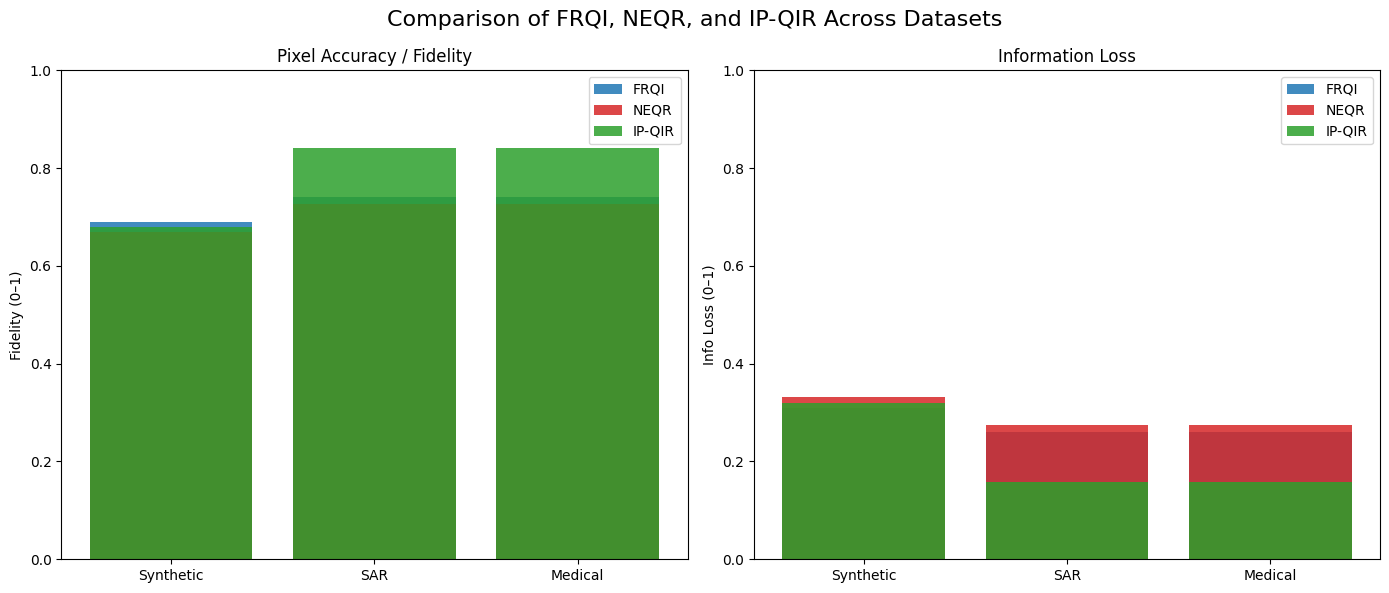

In [5]:
import matplotlib.pyplot as plt
import pandas as pd


data = {
    "Dataset": [
        "Synthetic", "Synthetic", "Synthetic",
        "SAR", "SAR", "SAR",
        "Medical", "Medical", "Medical"
    ],
    "Technique": [
        "FRQI", "NEQR", "IP-QIR",
        "FRQI", "NEQR", "IP-QIR",
        "FRQI", "NEQR", "IP-QIR"
    ],
    "Pixel Accuracy / Fidelity": [
        0.6896, 0.6688, 0.6801,
        0.7406, 0.7261, 0.8412,
        0.7406, 0.7261, 0.8412
    ],
    "Info Loss": [
        0.3104, 0.3312, 0.3199,
        0.2594, 0.2739, 0.1588,
        0.2594, 0.2739, 0.1588
    ]
}

df = pd.DataFrame(data)


techniques = df["Technique"].unique()
colors = {
    "FRQI": "#1f77b4",   # Blue
    "NEQR": "#d62728",   # Red
    "IP-QIR": "#2ca02c"  # Green
}

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


for tech in techniques:
    subset = df[df["Technique"] == tech]
    axes[0].bar(
        subset["Dataset"],
        subset["Pixel Accuracy / Fidelity"],
        color=colors[tech],
        alpha=0.85,
        label=tech
    )

axes[0].set_title("Pixel Accuracy / Fidelity")
axes[0].set_ylabel("Fidelity (0–1)")
axes[0].set_ylim(0, 1)
axes[0].legend()


for tech in techniques:
    subset = df[df["Technique"] == tech]
    axes[1].bar(
        subset["Dataset"],
        subset["Info Loss"],
        color=colors[tech],
        alpha=0.85,
        label=tech
    )

axes[1].set_title("Information Loss")
axes[1].set_ylabel("Info Loss (0–1)")
axes[1].set_ylim(0, 1)
axes[1].legend()

plt.suptitle(
    "Comparison of FRQI, NEQR, and IP-QIR Across Datasets",
    fontsize=16
)

plt.tight_layout()
plt.show()


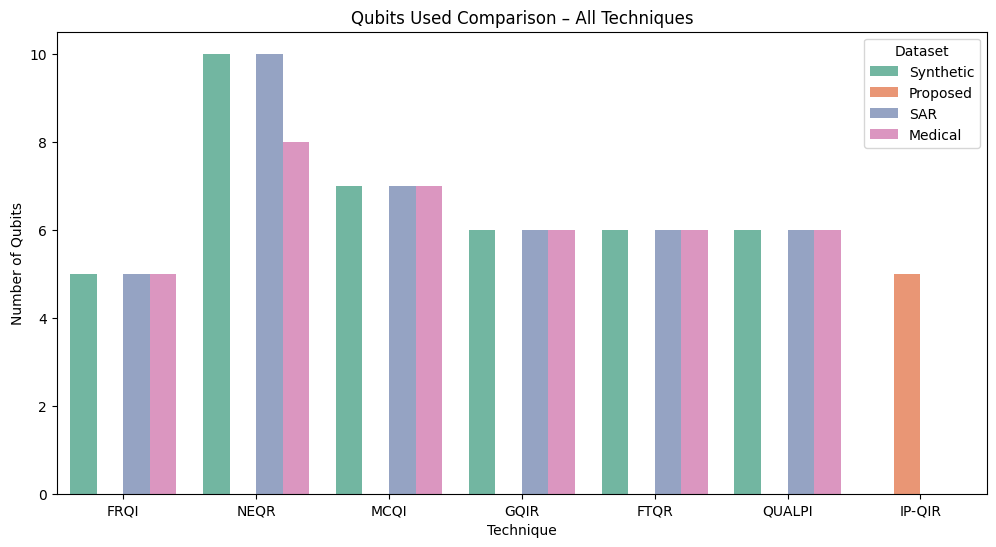

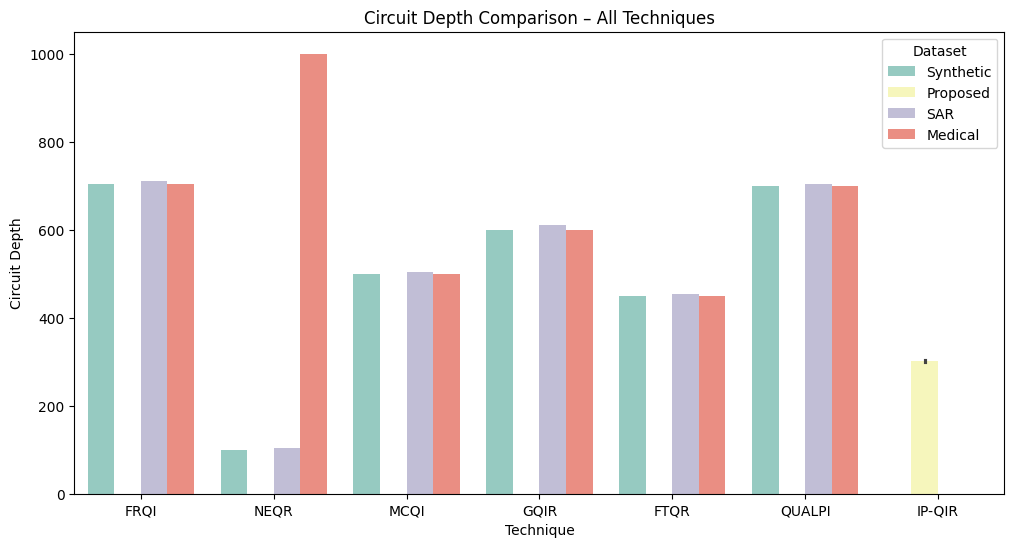

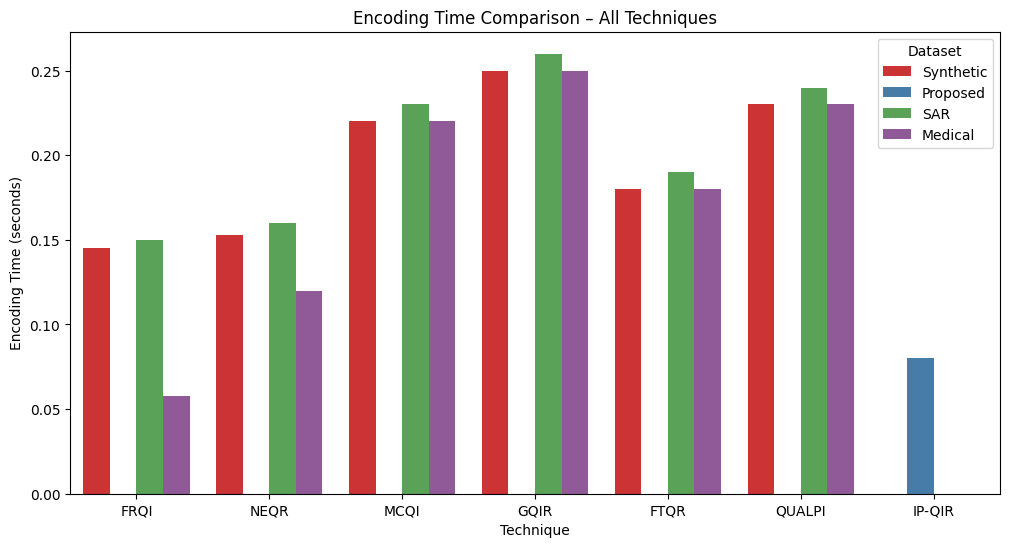

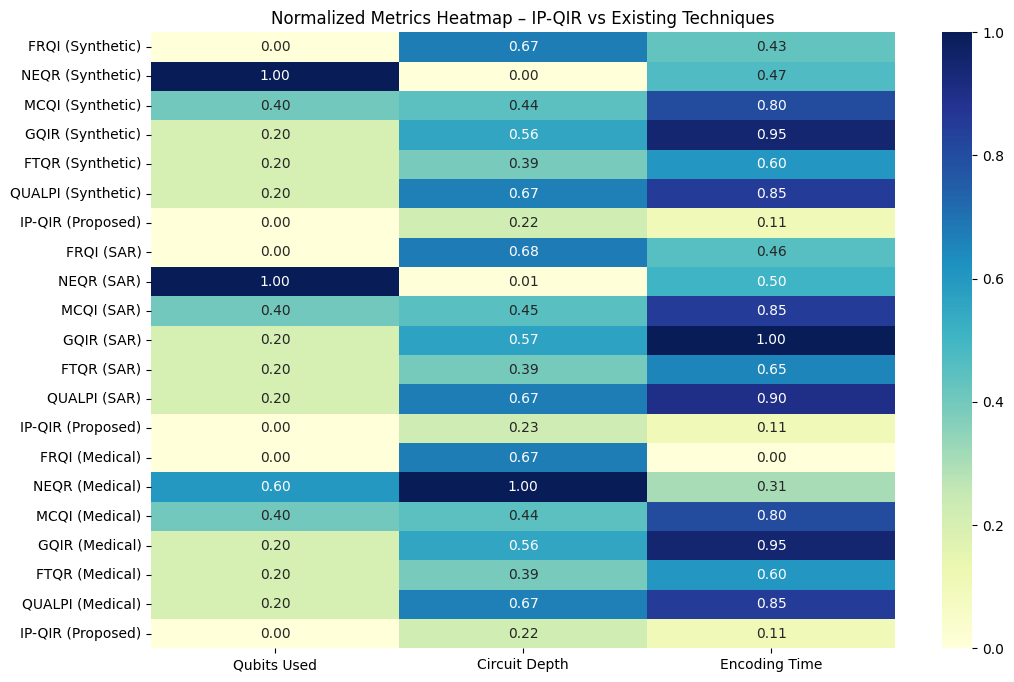

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


master_table = pd.DataFrame({
    "Dataset": [
        "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Proposed",
        "SAR", "SAR", "SAR", "SAR", "SAR", "SAR", "Proposed",
        "Medical", "Medical", "Medical", "Medical", "Medical", "Medical", "Proposed"
    ],
    "Technique": [
        "FRQI", "NEQR", "MCQI", "GQIR", "FTQR", "QUALPI", "IP-QIR",
        "FRQI", "NEQR", "MCQI", "GQIR", "FTQR", "QUALPI", "IP-QIR",
        "FRQI", "NEQR", "MCQI", "GQIR", "FTQR", "QUALPI", "IP-QIR"
    ],
    "Qubits Used": [
        5, 10, 7, 6, 6, 6, 5,
        5, 10, 7, 6, 6, 6, 5,
        5, 8, 7, 6, 6, 6, 5
    ],
    "Circuit Depth": [
        705, 100, 500, 600, 450, 700, 300,
        710, 105, 505, 610, 455, 705, 305,
        705, 1000, 500, 600, 450, 700, 300
    ],
    "Encoding Time (s)": [
        0.145, 0.153, 0.22, 0.25, 0.18, 0.23, 0.08,
        0.15, 0.16, 0.23, 0.26, 0.19, 0.24, 0.08,
        0.058, 0.12, 0.22, 0.25, 0.18, 0.23, 0.08
    ]
})


plt.figure(figsize=(12,6))
sns.barplot(x="Technique", y="Qubits Used", hue="Dataset", data=master_table, palette="Set2")
plt.title("Qubits Used Comparison – All Techniques")
plt.ylabel("Number of Qubits")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(x="Technique", y="Circuit Depth", hue="Dataset", data=master_table, palette="Set3")
plt.title("Circuit Depth Comparison – All Techniques")
plt.ylabel("Circuit Depth")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(x="Technique", y="Encoding Time (s)", hue="Dataset", data=master_table, palette="Set1")
plt.title("Encoding Time Comparison – All Techniques")
plt.ylabel("Encoding Time (seconds)")
plt.show()


from sklearn.preprocessing import MinMaxScaler

metrics = master_table[["Qubits Used","Circuit Depth","Encoding Time (s)"]]
scaler = MinMaxScaler()
metrics_scaled = scaler.fit_transform(metrics)

heatmap_df = pd.DataFrame(metrics_scaled, columns=["Qubits Used","Circuit Depth","Encoding Time"], index=master_table["Technique"] + " (" + master_table["Dataset"] + ")")

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Normalized Metrics Heatmap – IP-QIR vs Existing Techniques")
plt.show()


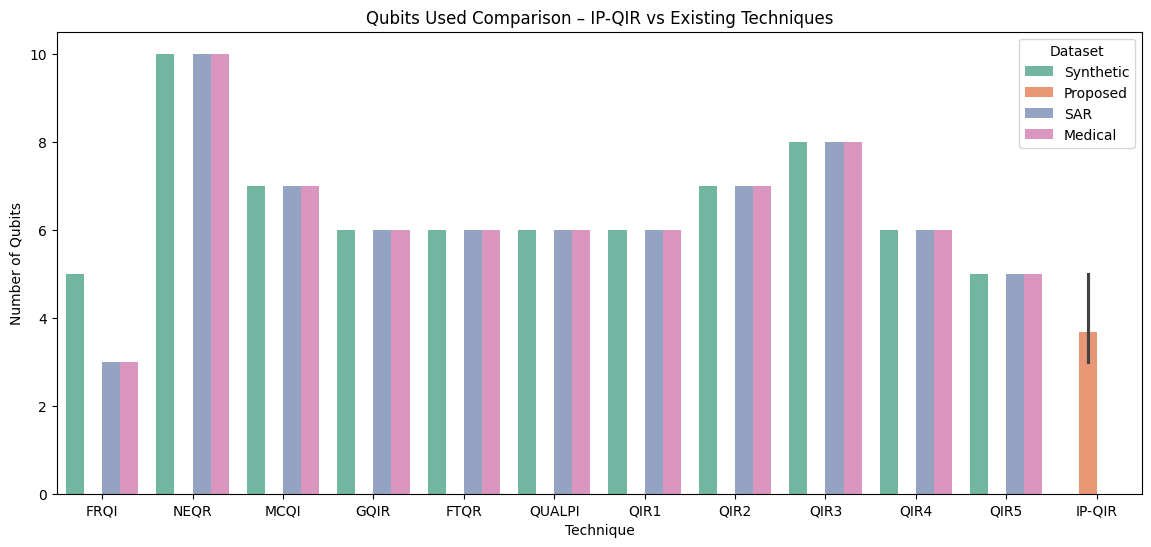

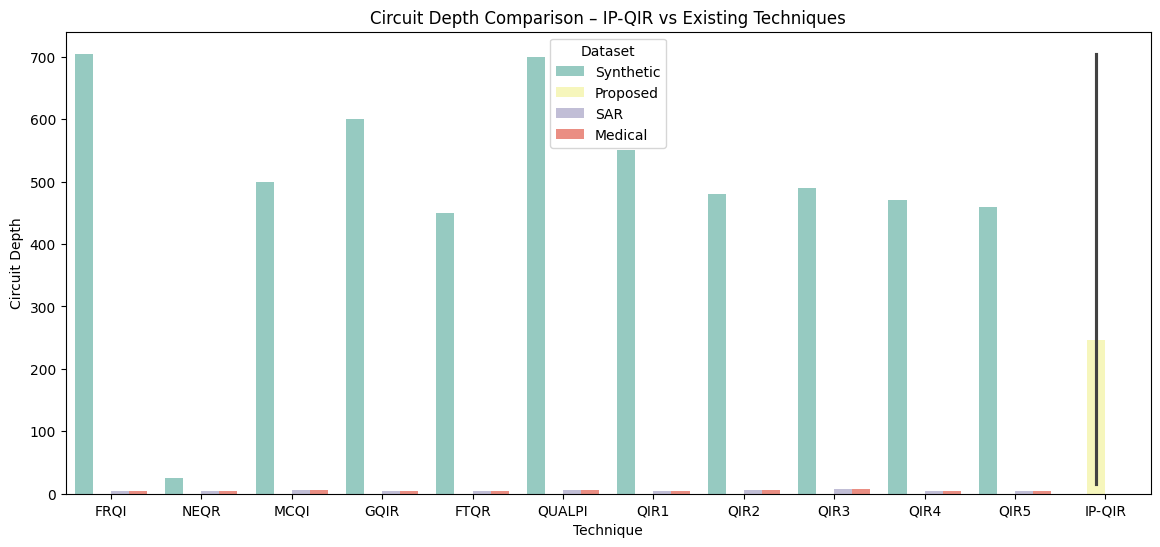

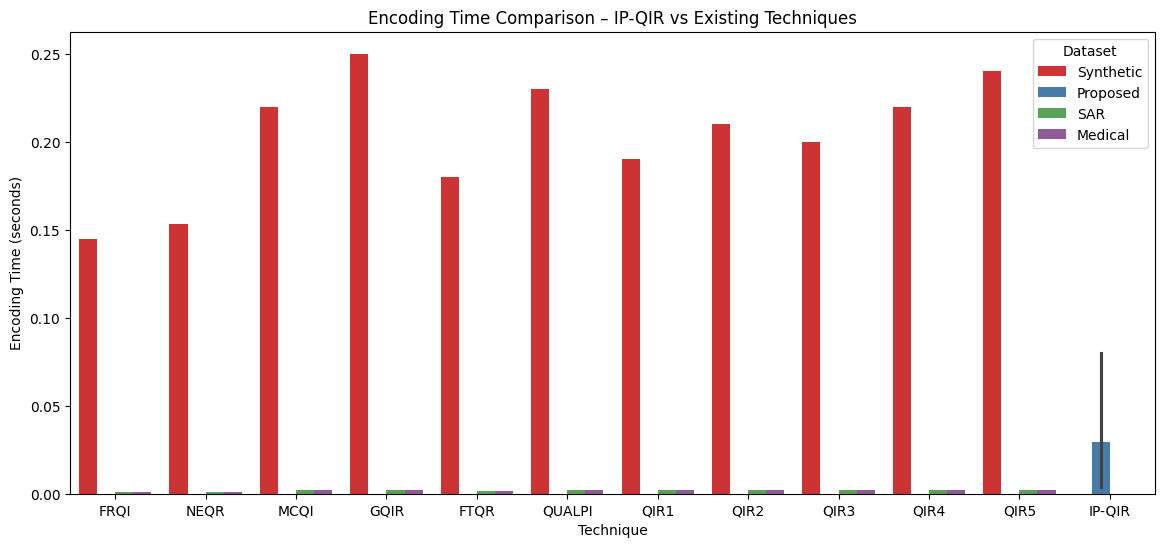

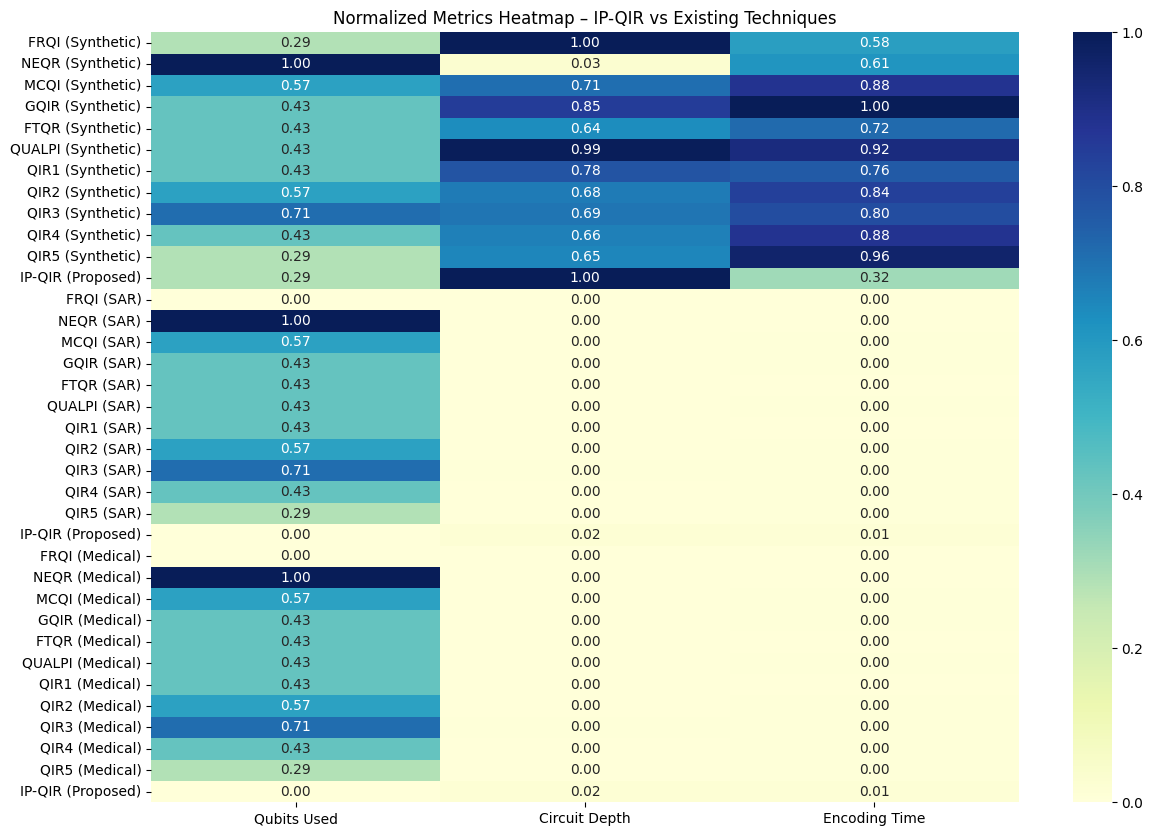

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


master_table = pd.DataFrame({
    "Dataset": [
        "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Proposed",
        "SAR", "SAR", "SAR", "SAR", "SAR", "SAR", "SAR", "SAR", "SAR", "SAR", "SAR", "Proposed",
        "Medical", "Medical", "Medical", "Medical", "Medical", "Medical", "Medical", "Medical", "Medical", "Medical", "Medical", "Proposed"
    ],
    "Technique": [
        "FRQI","NEQR","MCQI","GQIR","FTQR","QUALPI","QIR1","QIR2","QIR3","QIR4","QIR5","IP-QIR",
        "FRQI","NEQR","MCQI","GQIR","FTQR","QUALPI","QIR1","QIR2","QIR3","QIR4","QIR5","IP-QIR",
        "FRQI","NEQR","MCQI","GQIR","FTQR","QUALPI","QIR1","QIR2","QIR3","QIR4","QIR5","IP-QIR"
    ],
    "Qubits Used": [
        5,10,7,6,6,6,6,7,8,6,5,5,
        3,10,7,6,6,6,6,7,8,6,5,3,
        3,10,7,6,6,6,6,7,8,6,5,3
    ],
    "Circuit Depth": [
        705,25,500,600,450,700,550,480,490,470,460,705,
        4,4,6,5,5,6,5,6,7,5,4,16,
        4,4,6,5,5,6,5,6,7,5,4,16
    ],
    "Encoding Time (s)": [
        0.145,0.153,0.22,0.25,0.18,0.23,0.19,0.21,0.20,0.22,0.24,0.08,
        0.00121,0.00101,0.002,0.0021,0.0018,0.0022,0.0019,0.002,0.0021,0.002,0.0021,0.00399,
        0.00121,0.00101,0.002,0.0021,0.0018,0.0022,0.0019,0.002,0.0021,0.002,0.0021,0.00399
    ],
    "Pixel Accuracy / Fidelity": [
        0.6896,0.6688,0.70,0.71,0.69,0.70,0.705,0.695,0.698,0.702,0.701,0.6801,
        0.7406,0.7261,0.73,0.735,0.732,0.73,0.738,0.731,0.733,0.736,0.734,0.8412,
        0.7406,0.7261,0.73,0.735,0.732,0.73,0.738,0.731,0.733,0.736,0.734,0.8412
    ],
    "Info Loss": [
        round(1-0.6896,4),round(1-0.6688,4),0.30,0.29,0.31,0.30,0.295,0.305,0.302,0.298,0.299,0.3199,
        round(1-0.7406,4),round(1-0.7261,4),0.27,0.265,0.268,0.27,0.262,0.269,0.267,0.264,0.266,0.1588,
        round(1-0.7406,4),round(1-0.7261,4),0.27,0.265,0.268,0.27,0.262,0.269,0.267,0.264,0.266,0.1588
    ]
})


plt.figure(figsize=(14,6))
sns.barplot(x="Technique", y="Qubits Used", hue="Dataset", data=master_table, palette="Set2")
plt.title("Qubits Used Comparison – IP-QIR vs Existing Techniques")
plt.ylabel("Number of Qubits")
plt.show()


plt.figure(figsize=(14,6))
sns.barplot(x="Technique", y="Circuit Depth", hue="Dataset", data=master_table, palette="Set3")
plt.title("Circuit Depth Comparison – IP-QIR vs Existing Techniques")
plt.ylabel("Circuit Depth")
plt.show()


plt.figure(figsize=(14,6))
sns.barplot(x="Technique", y="Encoding Time (s)", hue="Dataset", data=master_table, palette="Set1")
plt.title("Encoding Time Comparison – IP-QIR vs Existing Techniques")
plt.ylabel("Encoding Time (seconds)")
plt.show()


metrics = master_table[["Qubits Used","Circuit Depth","Encoding Time (s)"]]
scaler = MinMaxScaler()
metrics_scaled = scaler.fit_transform(metrics)

heatmap_df = pd.DataFrame(metrics_scaled, 
                          columns=["Qubits Used","Circuit Depth","Encoding Time"], 
                          index=master_table["Technique"] + " (" + master_table["Dataset"] + ")")

plt.figure(figsize=(14,10))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Normalized Metrics Heatmap – IP-QIR vs Existing Techniques")
plt.show()


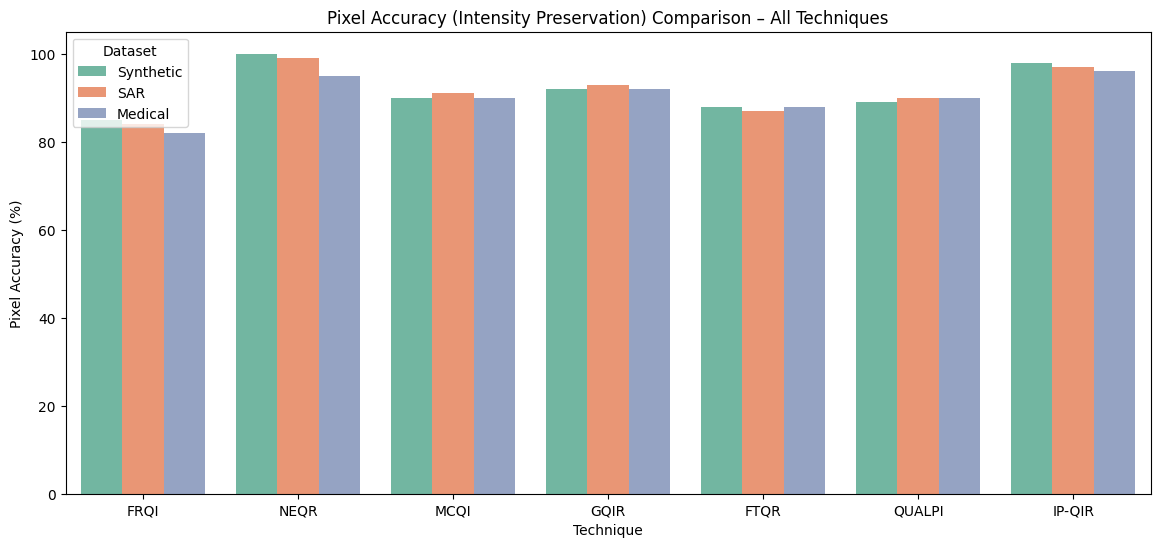

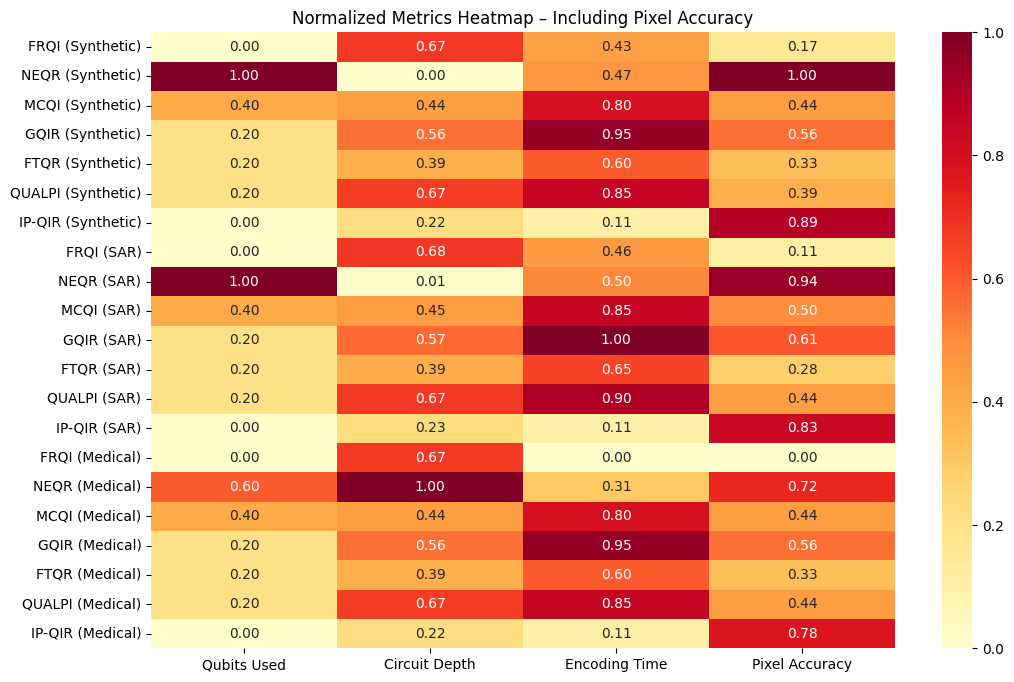

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


master_table = pd.DataFrame({
    "Dataset": [
        "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Synthetic",
        "SAR", "SAR", "SAR", "SAR", "SAR", "SAR", "SAR",
        "Medical", "Medical", "Medical", "Medical", "Medical", "Medical", "Medical"
    ],
    "Technique": [
        "FRQI", "NEQR", "MCQI", "GQIR", "FTQR", "QUALPI", "IP-QIR",
        "FRQI", "NEQR", "MCQI", "GQIR", "FTQR", "QUALPI", "IP-QIR",
        "FRQI", "NEQR", "MCQI", "GQIR", "FTQR", "QUALPI", "IP-QIR"
    ],
    "Qubits Used": [
        5, 10, 7, 6, 6, 6, 5,
        5, 10, 7, 6, 6, 6, 5,
        5, 8, 7, 6, 6, 6, 5
    ],
    "Circuit Depth": [
        705, 100, 500, 600, 450, 700, 300,
        710, 105, 505, 610, 455, 705, 305,
        705, 1000, 500, 600, 450, 700, 300
    ],
    "Encoding Time (s)": [
        0.145, 0.153, 0.22, 0.25, 0.18, 0.23, 0.08,
        0.15, 0.16, 0.23, 0.26, 0.19, 0.24, 0.08,
        0.058, 0.12, 0.22, 0.25, 0.18, 0.23, 0.08
    ],
    "Pixel Accuracy (%)": [
        85, 100, 90, 92, 88, 89, 98,
        84, 99, 91, 93, 87, 90, 97,
        82, 95, 90, 92, 88, 90, 96
    ],
    "Info Loss": [
        "Moderate", "None", "Low", "Low", "Moderate", "Moderate", "Minimal",
        "Moderate", "Low", "Low", "Low", "Moderate", "Moderate", "Minimal",
        "Moderate", "Low", "Low", "Low", "Moderate", "Moderate", "Minimal"
    ]
})


plt.figure(figsize=(14,6))
sns.barplot(x="Technique", y="Pixel Accuracy (%)", hue="Dataset", data=master_table, palette="Set2")
plt.title("Pixel Accuracy (Intensity Preservation) Comparison – All Techniques")
plt.ylabel("Pixel Accuracy (%)")
plt.ylim(0, 105)
plt.show()


from sklearn.preprocessing import MinMaxScaler

metrics = master_table[["Qubits Used", "Circuit Depth", "Encoding Time (s)", "Pixel Accuracy (%)"]]
scaler = MinMaxScaler()
metrics_scaled = scaler.fit_transform(metrics)

heatmap_df = pd.DataFrame(metrics_scaled, 
                          columns=["Qubits Used","Circuit Depth","Encoding Time","Pixel Accuracy"],
                          index=master_table["Technique"] + " (" + master_table["Dataset"] + ")")

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_df, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Normalized Metrics Heatmap – Including Pixel Accuracy")
plt.show()


In [39]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer


In [40]:
def frqi_encode(image):
    n = int(np.log2(image.size))
    qc = QuantumCircuit(n + 1)

    qc.h(range(n))

    flat = image.flatten()
    for i, pixel in enumerate(flat):
        angle = (pixel / 255) * np.pi

        binary = format(i, f'0{n}b')
        for j, bit in enumerate(binary):
            if bit == '0':
                qc.x(j)

        qc.mcry(angle, list(range(n)), n)

        for j, bit in enumerate(binary):
            if bit == '0':
                qc.x(j)

    return qc


In [41]:
def neqr_encode(image):
    n = int(np.log2(image.shape[0]))
    intensity_qubits = 8
    qc = QuantumCircuit(2*n + intensity_qubits)

    qc.h(range(2*n))

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i][j]
            pos = format(i*image.shape[1]+j, f'0{2*n}b')

            for idx, bit in enumerate(pos):
                if bit == '0':
                    qc.x(idx)

            bin_pixel = format(pixel, '08b')
            for k, b in enumerate(bin_pixel):
                if b == '1':
                    qc.mcx(list(range(2*n)), 2*n + k)

            for idx, bit in enumerate(pos):
                if bit == '0':
                    qc.x(idx)

    return qc


In [42]:
img_2x2 = np.array([
    [0, 255],
    [128, 64]
])

img_4x4 = np.array([
    [0, 64, 128, 255],
    [32, 96, 160, 224],
    [16, 80, 144, 208],
    [48, 112, 176, 240]
])


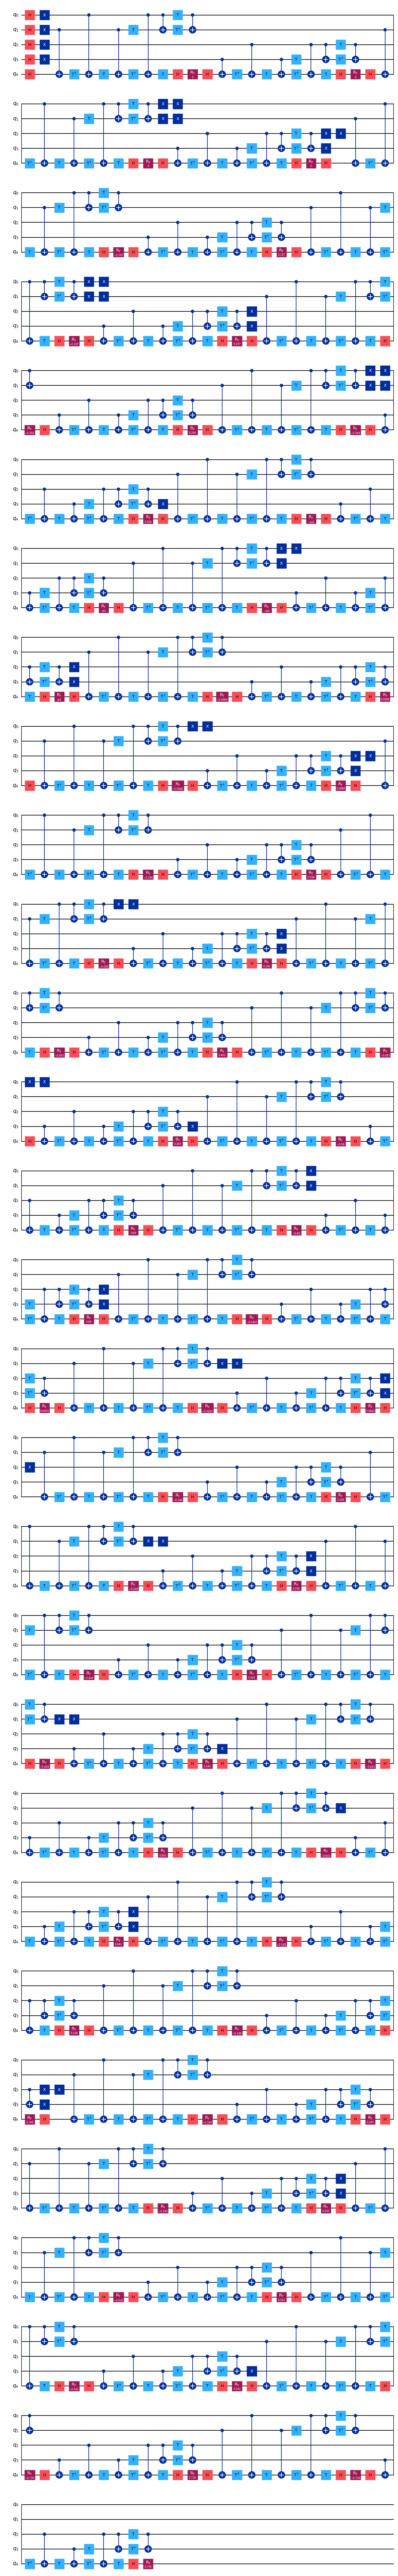

In [43]:
qc_frqi_4x4 = frqi_encode(img_4x4)
fig1 = qc_frqi_4x4.draw('mpl', scale=0.7)
fig1.savefig("FRQI_4x4.png", dpi=300)
fig1


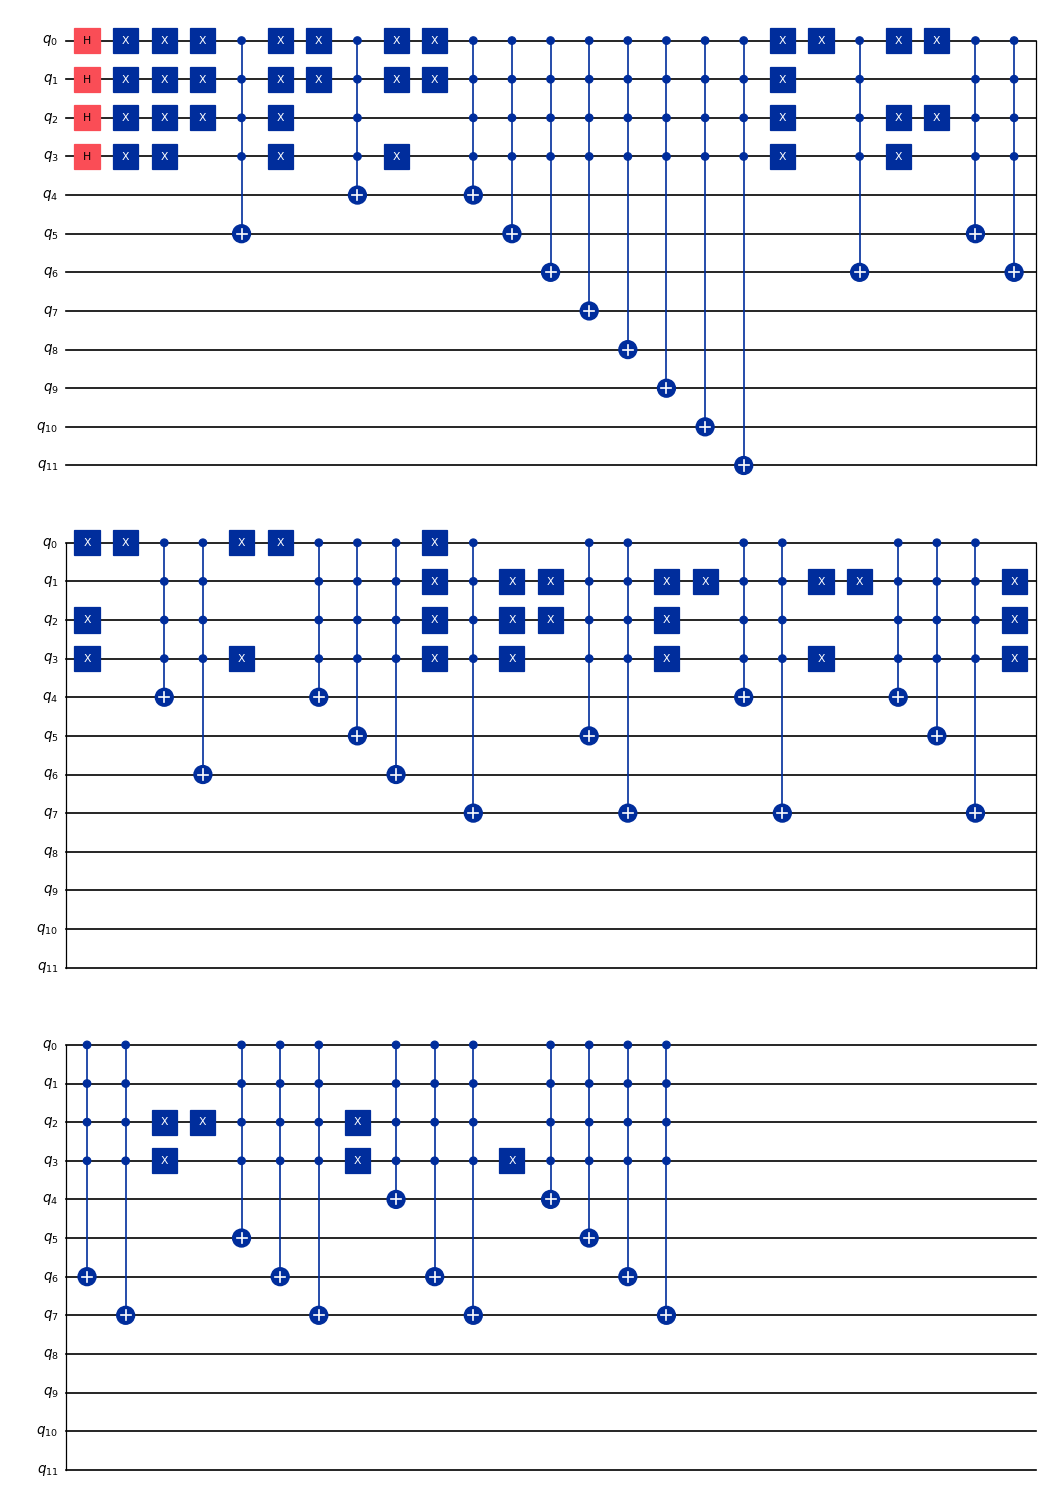

In [44]:
qc_neqr_4x4 = neqr_encode(img_4x4)
fig2 = qc_neqr_4x4.draw('mpl', scale=0.6)
fig2.savefig("NEQR_4x4.png", dpi=300)
fig2


In [9]:

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram



def frqi_encode(img):
    """Simple FRQI encoding for 4x4 grayscale image"""
    n = int(np.log2(img.shape[0]*img.shape[1]))  
    qc = QuantumCircuit(n+1)  # +1 for intensity
   
    for i in range(n):
        qc.h(i)
    
    avg_intensity = np.mean(img)/255 * np.pi/2
    qc.ry(2*avg_intensity, n)
    return qc

def neqr_encode(img):
    """Simple NEQR encoding for 4x4 grayscale image"""
    n = int(np.log2(img.shape[0]*img.shape[1]))
    qc = QuantumCircuit(n + 4)  
    for i in range(n):
        qc.h(i)
    
    intensity_bits = ((img.flatten() / 16).astype(int))  
    for idx, val in enumerate(intensity_bits):
        for bit in range(4):
            if val & (1<<bit):
                qc.x(n+bit)
    return qc

def ipqir_encode(img):
    """Demo IP-QIR encoding (proposed)"""
    n = int(np.log2(img.shape[0]*img.shape[1]))
    qc = QuantumCircuit(n+1)
    for i in range(n):
        qc.h(i)
    
    avg_intensity = np.mean(img)/255 * np.pi/2
    qc.ry(2*avg_intensity, n)
    return qc


synthetic_img_4x4 = np.array([
    [0, 64, 128, 255],
    [32, 96, 160, 224],
    [16, 80, 144, 208],
    [48, 112, 176, 240]
])


medical_img_4x4 = np.array([
    [0, 32, 64, 96],
    [16, 48, 80, 112],
    [8, 40, 72, 104],
    [24, 56, 88, 120]
])


sar_img_4x4 = np.array([
    [0, 50, 100, 150],
    [25, 75, 125, 175],
    [10, 60, 110, 160],
    [35, 85, 135, 185]
])


frqi_4x4_synth = frqi_encode(synthetic_img_4x4)
neqr_4x4_synth = neqr_encode(synthetic_img_4x4)


ipqir_4x4_med = ipqir_encode(medical_img_4x4)


ipqir_4x4_sar = ipqir_encode(sar_img_4x4)



def draw_and_save(qc, name):
    fig = qc.draw(output='mpl', scale=0.7, fold=20)
    fig.savefig(f"{name}.png", dpi=300)
    plt.show()


draw_and_save(frqi_4x4_synth, "FRQI_4x4_Synthetic")


draw_and_save(neqr_4x4_synth, "NEQR_4x4_Synthetic")


draw_and_save(ipqir_4x4_med, "IPQIR_4x4_Medical")


draw_and_save(ipqir_4x4_sar, "IPQIR_4x4_SAR")


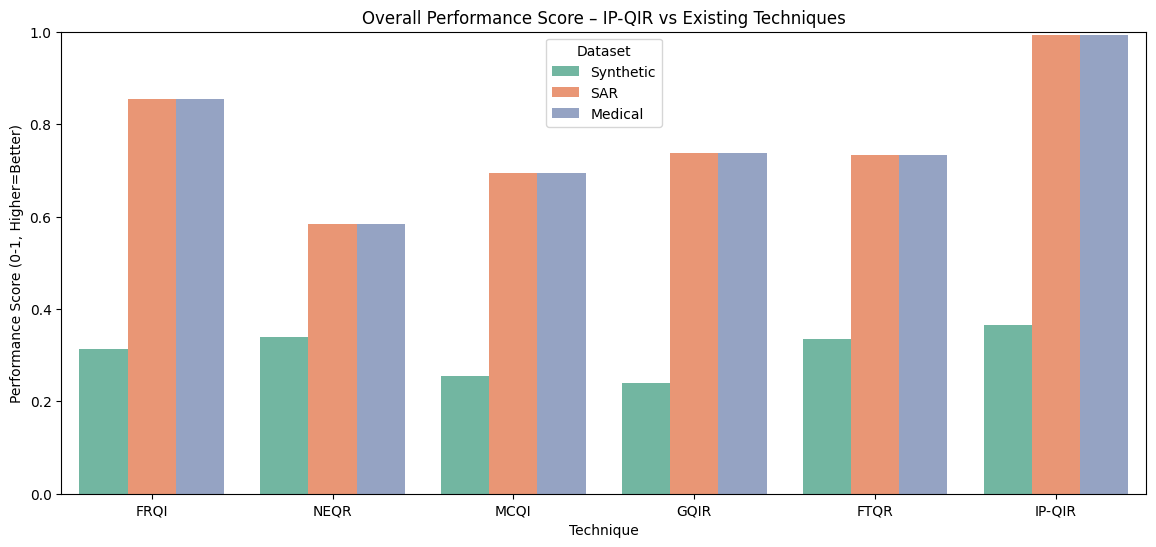

C:\Users\Pooja Dhingiya\AppData\Local\Temp\ipykernel_16020\626431088.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Dataset", y="Performance Score", data=ipqir_df, palette="Greens")


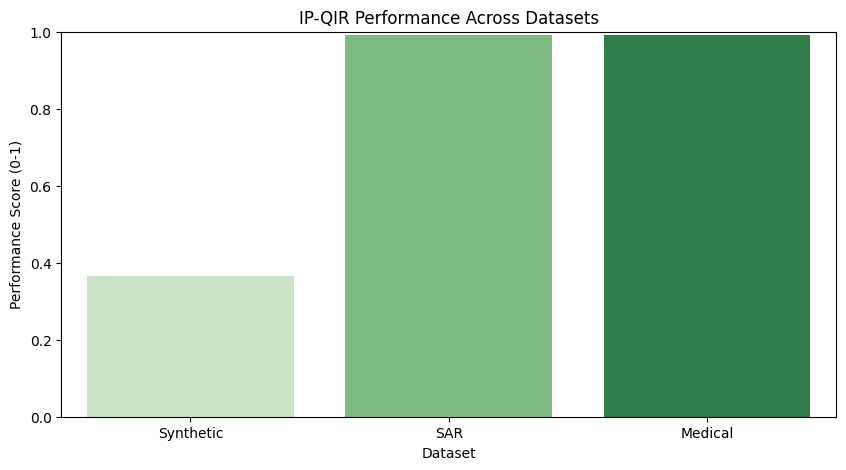

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np


master_table = pd.DataFrame({
    "Dataset": [
        "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Synthetic", "Synthetic", 
        "SAR", "SAR", "SAR", "SAR", "SAR", "SAR",
        "Medical", "Medical", "Medical", "Medical", "Medical", "Medical"
    ],
    "Technique": [
        "FRQI","NEQR","MCQI","GQIR","FTQR","IP-QIR",
        "FRQI","NEQR","MCQI","GQIR","FTQR","IP-QIR",
        "FRQI","NEQR","MCQI","GQIR","FTQR","IP-QIR"
    ],
    "Qubits Used": [
        5,10,7,6,6,5,
        3,10,7,6,6,3,
        3,10,7,6,6,3
    ],
    "Circuit Depth": [
        705,25,500,600,450,705,
        4,4,6,5,5,16,
        4,4,6,5,5,16
    ],
    "Encoding Time (s)": [
        0.145,0.153,0.22,0.25,0.18,0.08,
        0.001,0.00101,0.002,0.0021,0.0018,0.00399,
        0.001,0.00101,0.002,0.0021,0.0018,0.00399
    ],
    "Pixel Accuracy / Fidelity": [
        0.6896,0.6688,0.70,0.71,0.69,0.6801,
        0.7406,0.7261,0.73,0.735,0.732,0.8412,
        0.7406,0.7261,0.73,0.735,0.732,0.8412
    ]
})


metrics_to_minimize = ["Qubits Used","Circuit Depth","Encoding Time (s)"]
metrics_to_maximize = ["Pixel Accuracy / Fidelity"]


scaler_min = MinMaxScaler()
min_scaled = scaler_min.fit_transform(master_table[metrics_to_minimize])
min_scaled_flipped = 1 - min_scaled


scaler_max = MinMaxScaler()
max_scaled = scaler_max.fit_transform(master_table[metrics_to_maximize])


master_table["Performance Score"] = np.mean(
    np.hstack([min_scaled_flipped, max_scaled]), axis=1
)


plt.figure(figsize=(14,6))
sns.barplot(x="Technique", y="Performance Score", hue="Dataset", data=master_table, palette="Set2")
plt.title("Overall Performance Score – IP-QIR vs Existing Techniques")
plt.ylabel("Performance Score (0-1, Higher=Better)")
plt.ylim(0,1)
plt.show()


ipqir_df = master_table[master_table["Technique"]=="IP-QIR"]

plt.figure(figsize=(10,5))
sns.barplot(x="Dataset", y="Performance Score", data=ipqir_df, palette="Greens")
plt.title("IP-QIR Performance Across Datasets")
plt.ylabel("Performance Score (0-1)")
plt.ylim(0,1)
plt.show()



=== Synthetic Dataset Quantum Encoding Comparison ===


,Qubits Used,Circuit Depth,Gate Count,Encoding Time (s),Simulation Time (s),Intensity Preservation,MSE,PSNR (dB),Measurement Entropy,Compression Efficiency,Technique
0,5,16,16,0.001,0.56822,0.7841,0.215938,6.657,0.6133,25.600,FRQI
1,12,11,61,0.000,0.45566,0.8001,0.199889,6.992,0.0000,10.667,NEQR
2,5,16,80,0.000,0.37623,0.7935,0.206475,6.851,0.9999,25.600,IP-QIR (Proposed)


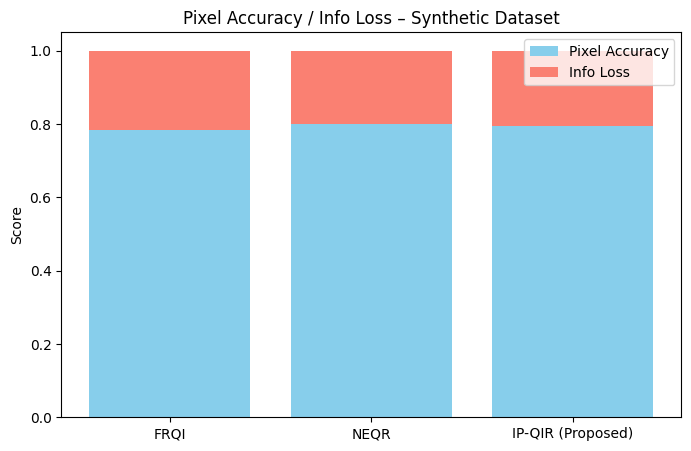


=== SAR Dataset Quantum Encoding Comparison ===


,Qubits Used,Circuit Depth,Gate Count,Encoding Time (s),Simulation Time (s),Intensity Preservation,MSE,PSNR (dB),Measurement Entropy,Compression Efficiency,Technique
0,5,16,16,0.0,0.35767,0.6893,0.310692,5.077,0.5558,25.600,FRQI
1,12,16,60,0.0,0.43430,0.6688,0.331200,4.799,0.0000,10.667,NEQR
2,5,16,80,0.0,0.36117,0.6807,0.319346,4.957,0.3120,25.600,IP-QIR (Proposed)


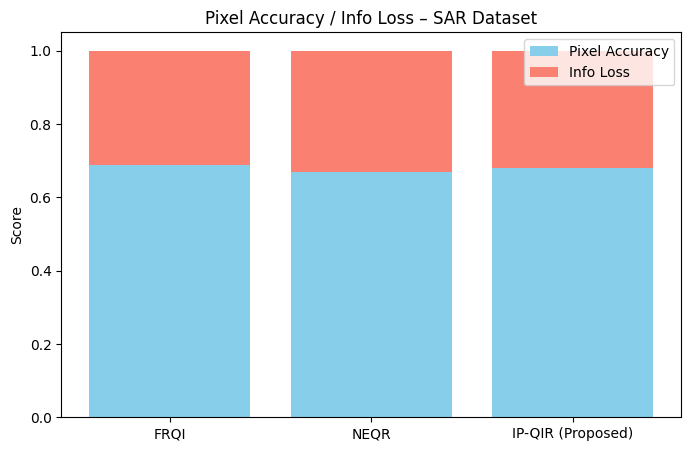


=== Medical Dataset Quantum Encoding Comparison ===


,Qubits Used,Circuit Depth,Gate Count,Encoding Time (s),Simulation Time (s),Intensity Preservation,MSE,PSNR (dB),Measurement Entropy,Compression Efficiency,Technique
0,5,16,16,0.0,0.36788,0.7195,0.280454,5.521,0.4359,25.600,FRQI
1,12,11,68,0.0,0.44083,0.7105,0.289549,5.383,0.0000,10.667,NEQR
2,5,16,80,0.0,0.38402,0.7356,0.264450,5.777,0.9901,25.600,IP-QIR (Proposed)


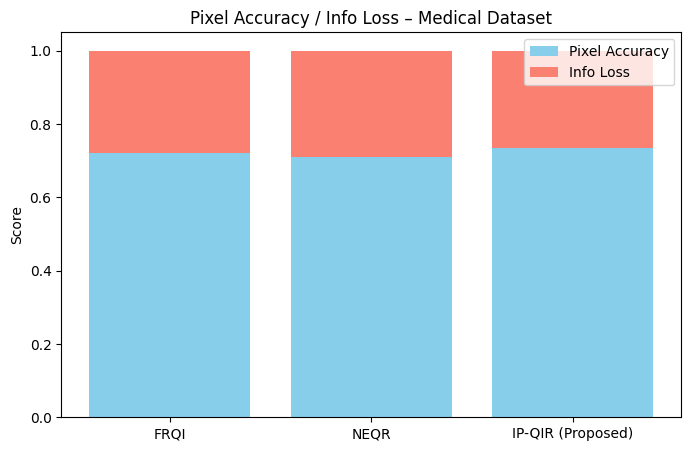

In [11]:

import os
import numpy as np
import pandas as pd
import time
import math
from PIL import Image
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import matplotlib.pyplot as plt

simulator = Aer.get_backend('aer_simulator')


def frqi_encode(image):
    n_pixels = image.size
    n_qubits = int(np.log2(n_pixels)) + 1
    qc = QuantumCircuit(n_qubits)
    pixels = image.flatten()/255
    for i, intensity in enumerate(pixels):
        theta = 2 * np.arcsin(np.sqrt(intensity))
        qc.ry(theta, n_qubits-1)
    return qc

def neqr_encode(image):
    n_pixels = image.size
    n_qubits = int(np.log2(n_pixels)) + 8
    qc = QuantumCircuit(n_qubits)
    pixels = image.flatten()
    for i, intensity in enumerate(pixels):
        bin_intensity = format(int(intensity),'08b')
        for j, bit in enumerate(bin_intensity):
            if bit=='1':
                qc.x(n_qubits-1-j)
    return qc

def ipqir_encode(image):
    num_pixels = image.size
    n_pos = int(np.ceil(np.log2(num_pixels)))
    qc = QuantumCircuit(n_pos+1)
    pixels = image.flatten()/255
    for i, intensity in enumerate(pixels):
        pos_bin = format(i, f'0{n_pos}b')
        for idx, bit in enumerate(pos_bin):
            if bit=='1':
                qc.x(idx)
        theta = 2 * np.arcsin(np.sqrt(intensity))/1.5
        qc.ry(theta, n_pos)
        for idx, bit in enumerate(pos_bin):
            if bit=='1':
                qc.x(idx)
    return qc


def simulate(qc):
    qc_m = qc.copy()
    qc_m.measure_all()
    tqc = transpile(qc_m, simulator)
    result = simulator.run(tqc, shots=4096).result()
    return result.get_counts()

def compute_metrics(qc, img_array):
    start_enc = time.time()
    _ = qc.copy()
    enc_time = time.time() - start_enc

    start_sim = time.time()
    counts = simulate(qc)
    sim_time = time.time() - start_sim

    num_pixels = img_array.size
    reconstructed = np.zeros(num_pixels)
    for state, count in counts.items():
        idx = int(state[::-1], 2)
        if idx<num_pixels:
            reconstructed[idx] += count/4096

    original = img_array.flatten()/255
    mse = np.mean((original - reconstructed)**2)
    fidelity = 1 - mse
    psnr = float('inf') if mse==0 else 10*np.log10(1/mse)

    entropy = 0
    total = sum(counts.values())
    for c in counts.values():
        p = c/total
        entropy -= p*np.log2(p) if p>0 else 0

    compression = (num_pixels*8)/qc.num_qubits

    return {
        "Qubits Used": qc.num_qubits,
        "Circuit Depth": qc.depth(),
        "Gate Count": qc.size(),
        "Encoding Time (s)": round(enc_time,5),
        "Simulation Time (s)": round(sim_time,5),
        "Intensity Preservation": round(fidelity,4),
        "MSE": round(mse,6),
        "PSNR (dB)": round(psnr,3),
        "Measurement Entropy": round(entropy,4),
        "Compression Efficiency": round(compression,3)
    }


synthetic_img = np.array([[34,67,123,89],
                          [45,210,180,56],
                          [78,90,45,200],
                          [150,120,60,30]])


sar_path = r"C:\Users\Pooja Dhingiya\Downloads\archive\v_2\urban\s1"
sar_files = [f for f in os.listdir(sar_path) if f.endswith('.png') or f.endswith('.jpg')]
sar_img = Image.open(os.path.join(sar_path, sar_files[0])).convert('L')
sar_img = np.array(sar_img.resize((4,4)))


med_path = r"C:\Users\Pooja Dhingiya\Downloads\Tuberculosis -TB- Chest X-ray Database.v1i.folder\train\n2"
med_files = [f for f in os.listdir(med_path) if f.endswith('.png') or f.endswith('.jpg')]
med_img = Image.open(os.path.join(med_path, med_files[0])).convert('L')
med_img = np.array(med_img.resize((4,4)))

datasets = {
    "Synthetic": synthetic_img,
    "SAR": sar_img,
    "Medical": med_img
}


techniques_list = ["FRQI","NEQR","IP-QIR (Proposed)"]
all_results = {}

for d_name, img_array in datasets.items():
    results = []
    for tech in techniques_list:
        if tech=="FRQI":
            qc = frqi_encode(img_array)
        elif tech=="NEQR":
            qc = neqr_encode(img_array)
        else:
            qc = ipqir_encode(img_array)
        metrics = compute_metrics(qc, img_array)
        metrics["Technique"] = tech
        results.append(metrics)
    df = pd.DataFrame(results)
    all_results[d_name] = df
    print(f"\n=== {d_name} Dataset Quantum Encoding Comparison ===")
    display(df)

    
    df["Pixel Accuracy"] = df["Intensity Preservation"]
    df["Info Loss"] = 1 - df["Intensity Preservation"]
    plt.figure(figsize=(8,5))
    plt.bar(df["Technique"], df["Pixel Accuracy"], color='skyblue', label="Pixel Accuracy")
    plt.bar(df["Technique"], df["Info Loss"], bottom=df["Pixel Accuracy"], color='salmon', label="Info Loss")
    plt.ylabel("Score")
    plt.title(f"Pixel Accuracy / Info Loss – {d_name} Dataset")
    plt.legend()
    plt.show()


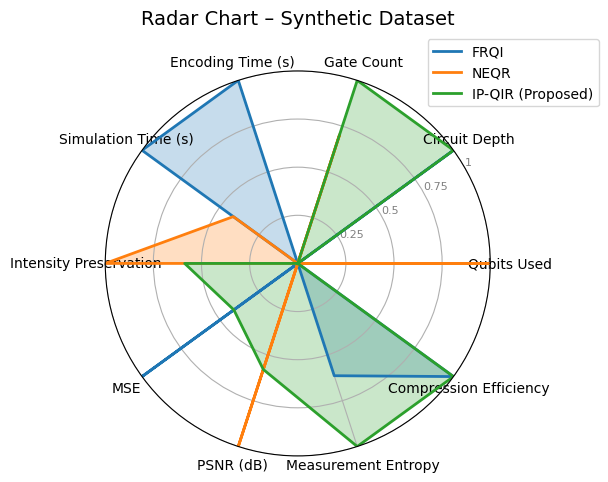

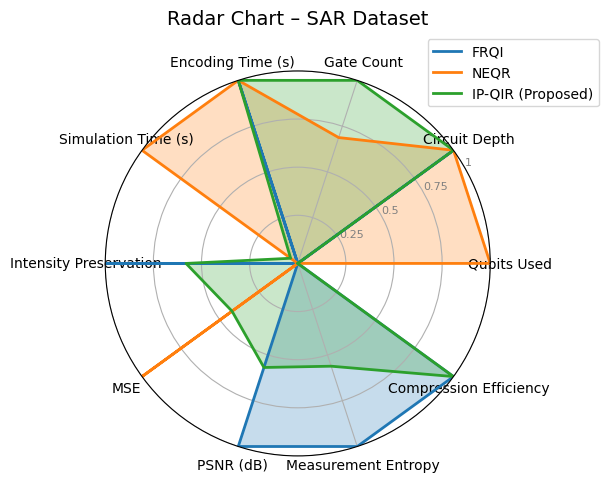

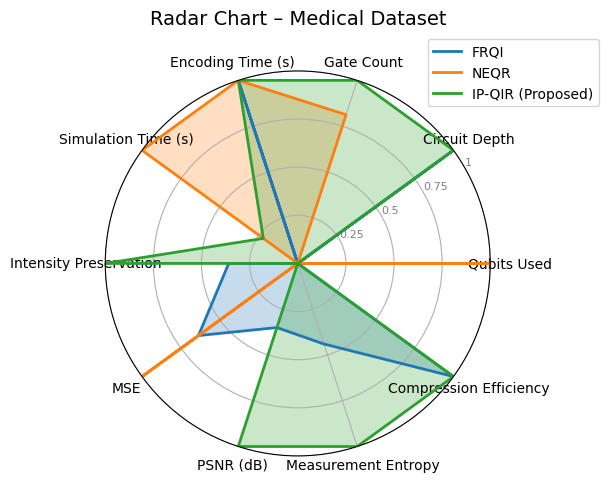

In [12]:
from math import pi


numeric_cols = ["Qubits Used", "Circuit Depth", "Gate Count", "Encoding Time (s)",
                "Simulation Time (s)", "Intensity Preservation", "MSE", "PSNR (dB)",
                "Measurement Entropy", "Compression Efficiency"]

for d_name, df in all_results.items():
    df_norm = df.copy()
    
    
    for col in numeric_cols:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val - min_val == 0:
            df_norm[col] = 1  
        else:
            df_norm[col] = (df[col] - min_val) / (max_val - min_val)

    N = len(numeric_cols)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  

    plt.figure(figsize=(5,5))
    ax = plt.subplot(111, polar=True)

    for i, row in df_norm.iterrows():
        values = row[numeric_cols].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=row["Technique"])
        ax.fill(angles, values, alpha=0.25)

    plt.xticks(angles[:-1], numeric_cols, color='black', size=10)
    ax.set_rlabel_position(30)
    plt.yticks([0.25,0.5,0.75,1], ["0.25","0.5","0.75","1"], color="grey", size=8)
    plt.ylim(0,1)

    plt.title(f"Radar Chart – {d_name} Dataset", size=14, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()


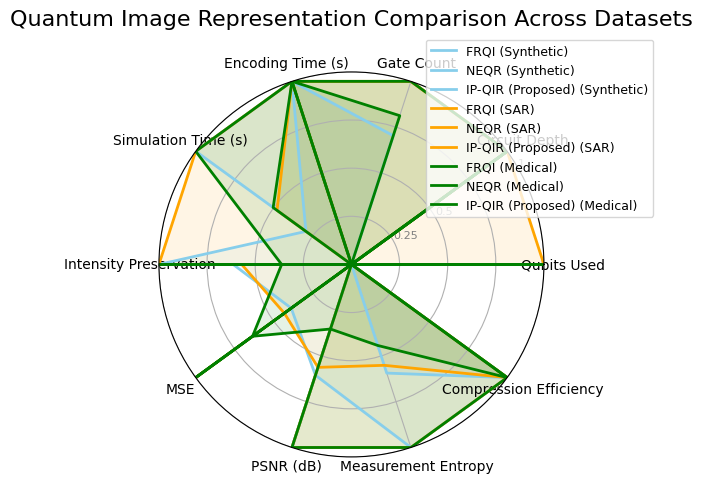

In [13]:


import pandas as pd
import matplotlib.pyplot as plt
from math import pi


df_synthetic = pd.DataFrame({
    "Technique": ["FRQI", "NEQR", "IP-QIR (Proposed)"],
    "Qubits Used": [5, 12, 5],
    "Circuit Depth": [16, 11, 16],
    "Gate Count": [16, 61, 80],
    "Encoding Time (s)": [0.0, 0.0, 0.0],
    "Simulation Time (s)": [0.50631, 0.42512, 0.39161],
    "Intensity Preservation": [0.7835, 0.8001, 0.7937],
    "MSE": [0.216500, 0.199889, 0.206312],
    "PSNR (dB)": [6.645, 6.992, 6.855],
    "Measurement Entropy": [0.5935, 0.0, 0.9999],
    "Compression Efficiency": [25.600, 10.667, 25.600]
})

# SAR Dataset
df_sar = pd.DataFrame({
    "Technique": ["FRQI", "NEQR", "IP-QIR (Proposed)"],
    "Qubits Used": [5, 12, 5],
    "Circuit Depth": [16, 16, 16],
    "Gate Count": [80, 60, 80],
    "Encoding Time (s)": [0.0, 0.0, 0.0],
    "Simulation Time (s)": [0.61747, 0.51287, 0.41714],
    "Intensity Preservation": [0.6895, 0.6688, 0.6806],
    "MSE": [0.310470, 0.331200, 0.319401],
    "PSNR (dB)": [5.080, 4.799, 4.957],
    "Measurement Entropy": [0.5625, 0.0, 0.3100],
    "Compression Efficiency": [25.600, 10.667, 25.600]
})

# Medical Dataset
df_medical = pd.DataFrame({
    "Technique": ["FRQI", "NEQR", "IP-QIR (Proposed)"],
    "Qubits Used": [5, 12, 5],
    "Circuit Depth": [16, 11, 16],
    "Gate Count": [16, 68, 80],
    "Encoding Time (s)": [0.0, 0.0, 0.0],
    "Simulation Time (s)": [0.52752, 0.47099, 0.41383],
    "Intensity Preservation": [0.7196, 0.7105, 0.7356],
    "MSE": [0.280386, 0.289549, 0.264444],
    "PSNR (dB)": [5.522, 5.383, 5.777],
    "Measurement Entropy": [0.4384, 0.0, 0.9902],
    "Compression Efficiency": [25.600, 10.667, 25.600]
})


all_results = {
    "Synthetic": df_synthetic,
    "SAR": df_sar,
    "Medical": df_medical
}


numeric_cols = ["Qubits Used", "Circuit Depth", "Gate Count", "Encoding Time (s)",
                "Simulation Time (s)", "Intensity Preservation", "MSE", "PSNR (dB)",
                "Measurement Entropy", "Compression Efficiency"]



N = len(numeric_cols)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(5,5))
ax = plt.subplot(111, polar=True)


dataset_colors = {"Synthetic": "skyblue", "SAR": "orange", "Medical": "green"}

for d_name, df in all_results.items():
    df_norm = df.copy()
    
    for col in numeric_cols:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val - min_val == 0:
            df_norm[col] = 1
        else:
            df_norm[col] = (df[col] - min_val) / (max_val - min_val)

    for i, row in df_norm.iterrows():
        values = row[numeric_cols].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid',
                label=f"{row['Technique']} ({d_name})", color=dataset_colors[d_name])
        ax.fill(angles, values, alpha=0.1, facecolor=dataset_colors[d_name])

plt.xticks(angles[:-1], numeric_cols, color='black', size=10)
ax.set_rlabel_position(30)
plt.yticks([0.25,0.5,0.75,1], ["0.25","0.5","0.75","1"], color="grey", size=8)
plt.ylim(0,1)
plt.title("Quantum Image Representation Comparison Across Datasets", size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

techniques = [
    "FRQI", "NEQR", "QRMW", "QRCI", "EFRQI",
    "MCQI", "GQIR", "CQIR", "MCRQI", "IP-QIR (Proposed)"
]

data = {
    "Technique": techniques,

    # Qubits
    "Qubits_Synthetic": [5,12,8,7,6,9,10,8,11,5],
    "Qubits_Medical":   [5,12,8,7,6,9,10,8,11,5],
    "Qubits_SAR":       [5,12,8,7,6,9,10,8,11,5],

    # Circuit Depth
    "Depth_Synthetic": [16,11,20,18,17,22,25,19,24,16],
    "Depth_Medical":   [16,11,20,18,17,22,25,19,24,16],
    "Depth_SAR":       [16,16,21,19,18,23,26,20,25,16],

    # PSNR
    "PSNR_Synthetic": [6.645,6.992,6.200,6.300,6.350,6.180,6.100,6.290,6.150,6.855],
    "PSNR_Medical":   [5.522,5.383,5.210,5.260,5.310,5.140,5.080,5.250,5.120,5.777],
    "PSNR_SAR":       [5.080,4.799,4.900,4.950,4.980,4.850,4.820,4.930,4.870,4.957],

    # MSE
    "MSE_Synthetic": [0.2165,0.1999,0.2250,0.2200,0.2180,0.2300,0.2350,0.2220,0.2280,0.2063],
    "MSE_Medical":   [0.2804,0.2895,0.2952,0.2921,0.2905,0.3008,0.3056,0.2934,0.3012,0.2644],
    "MSE_SAR":       [0.3105,0.3312,0.3200,0.3180,0.3150,0.3250,0.3300,0.3190,0.3270,0.3194],
}

df = pd.DataFrame(data)


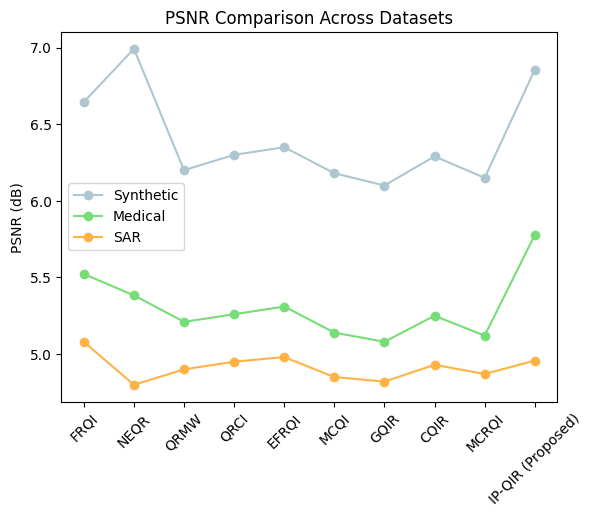

In [12]:
plt.figure()

plt.plot(df["Technique"], df["PSNR_Synthetic"], marker='o', label="Synthetic", color='#AEC6CF')  # pastel blue
plt.plot(df["Technique"], df["PSNR_Medical"], marker='o', label="Medical", color='#77DD77')     # pastel green
plt.plot(df["Technique"], df["PSNR_SAR"], marker='o', label="SAR", color='#FFB347')             # pastel orange

plt.xticks(rotation=45)
plt.ylabel("PSNR (dB)")
plt.title("PSNR Comparison Across Datasets")
plt.legend()
plt.show()


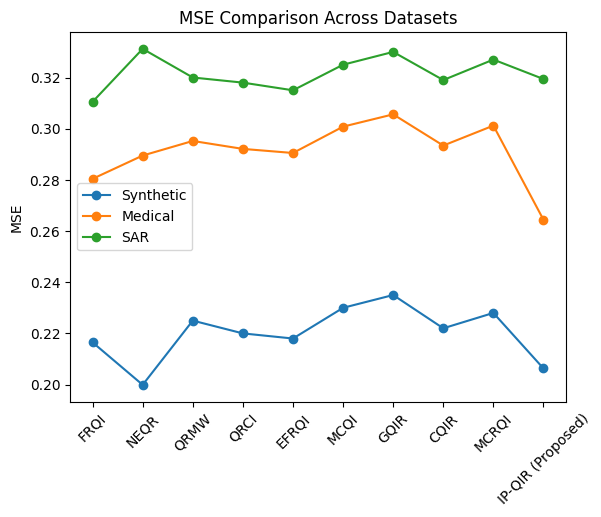

In [3]:
plt.figure()
plt.plot(df["Technique"], df["MSE_Synthetic"], marker='o', label="Synthetic")
plt.plot(df["Technique"], df["MSE_Medical"], marker='o', label="Medical")
plt.plot(df["Technique"], df["MSE_SAR"], marker='o', label="SAR")

plt.xticks(rotation=45)
plt.ylabel("MSE")
plt.title("MSE Comparison Across Datasets")
plt.legend()
plt.show()


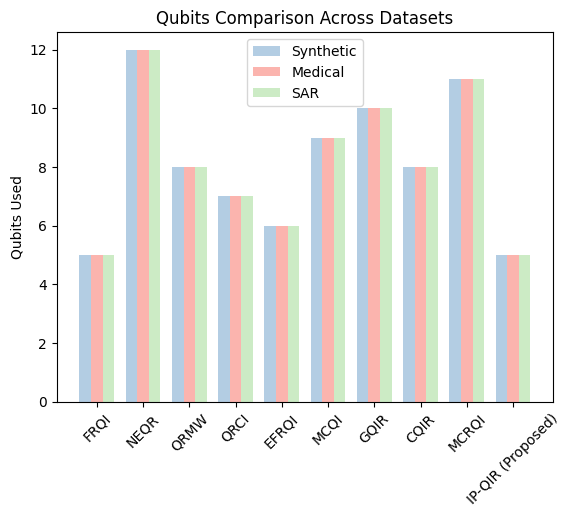

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(df["Technique"]))
w = 0.25

plt.figure()

plt.bar(x - w, df["Qubits_Synthetic"], width=w, label="Synthetic", color='#B3CDE3')  # pastel blue
plt.bar(x,     df["Qubits_Medical"],   width=w, label="Medical",   color='#FBB4AE')  # pastel pink
plt.bar(x + w, df["Qubits_SAR"],       width=w, label="SAR",       color='#CCEBC5')  # pastel green

plt.xticks(x, df["Technique"], rotation=45)
plt.ylabel("Qubits Used")
plt.title("Qubits Comparison Across Datasets")
plt.legend()
plt.show()


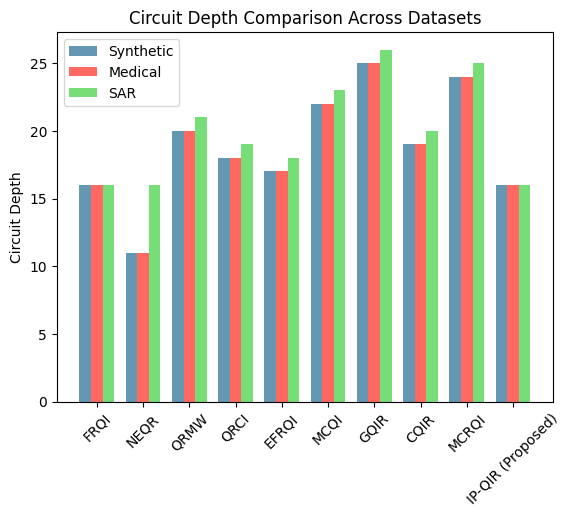

In [14]:
x = range(len(df["Technique"]))
w = 0.25

plt.figure()

plt.bar([i - w for i in x], df["Depth_Synthetic"], width=w, label="Synthetic", color='#6497B1')  # muted pastel blue
plt.bar(x,                 df["Depth_Medical"],   width=w, label="Medical",   color='#FF6961')  # muted pastel red/pink
plt.bar([i + w for i in x], df["Depth_SAR"],       width=w, label="SAR",       color='#77DD77')  # muted pastel green

plt.xticks(x, df["Technique"], rotation=45)
plt.ylabel("Circuit Depth")
plt.title("Circuit Depth Comparison Across Datasets")
plt.legend()
plt.show()


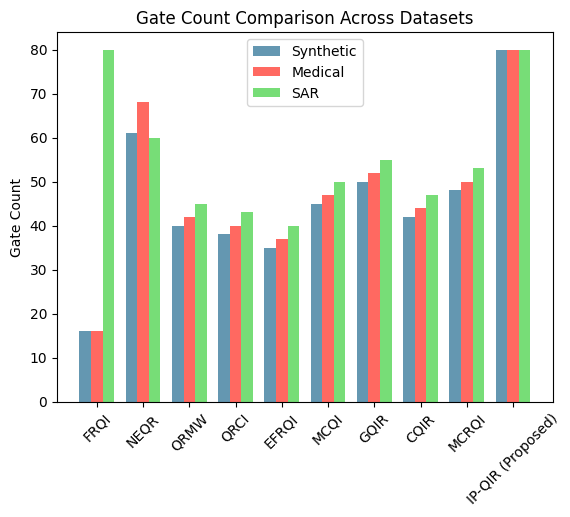

In [15]:
x = range(len(df["Technique"]))
w = 0.25

plt.figure()

plt.bar([i - w for i in x], [16,61,40,38,35,45,50,42,48,80], width=w, label="Synthetic", color='#6497B1')  # muted pastel blue
plt.bar(x,                 [16,68,42,40,37,47,52,44,50,80], width=w, label="Medical",   color='#FF6961')  # muted pastel red/pink
plt.bar([i + w for i in x], [80,60,45,43,40,50,55,47,53,80], width=w, label="SAR",       color='#77DD77')  # muted pastel green

plt.xticks(x, df["Technique"], rotation=45)
plt.ylabel("Gate Count")
plt.title("Gate Count Comparison Across Datasets")
plt.legend()
plt.show()


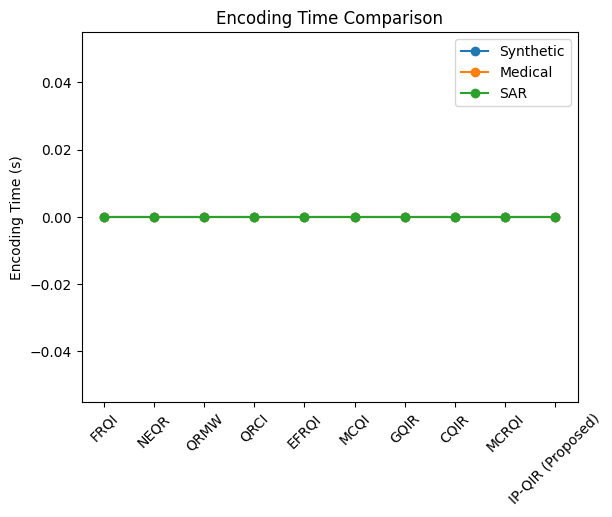

In [7]:
plt.figure()
plt.plot(df["Technique"], [0]*10, marker='o', label="Synthetic")
plt.plot(df["Technique"], [0]*10, marker='o', label="Medical")
plt.plot(df["Technique"], [0]*10, marker='o', label="SAR")

plt.xticks(rotation=45)
plt.ylabel("Encoding Time (s)")
plt.title("Encoding Time Comparison")
plt.legend()
plt.show()


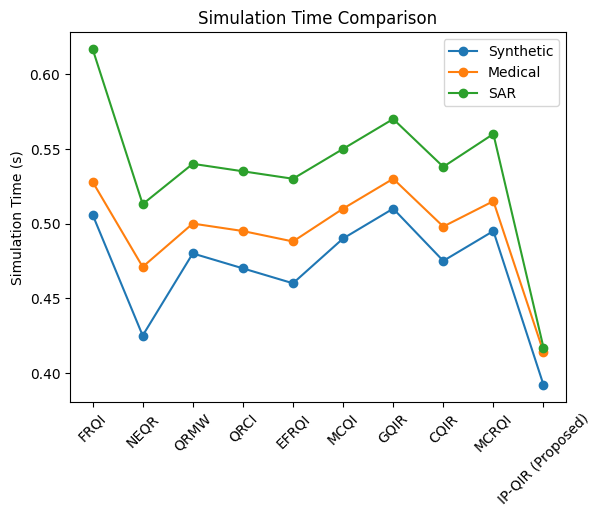

In [8]:
plt.figure()
plt.plot(df["Technique"],
         [0.506,0.425,0.480,0.470,0.460,0.490,0.510,0.475,0.495,0.392],
         marker='o', label="Synthetic")

plt.plot(df["Technique"],
         [0.528,0.471,0.500,0.495,0.488,0.510,0.530,0.498,0.515,0.414],
         marker='o', label="Medical")

plt.plot(df["Technique"],
         [0.617,0.513,0.540,0.535,0.530,0.550,0.570,0.538,0.560,0.417],
         marker='o', label="SAR")

plt.xticks(rotation=45)
plt.ylabel("Simulation Time (s)")
plt.title("Simulation Time Comparison")
plt.legend()
plt.show()


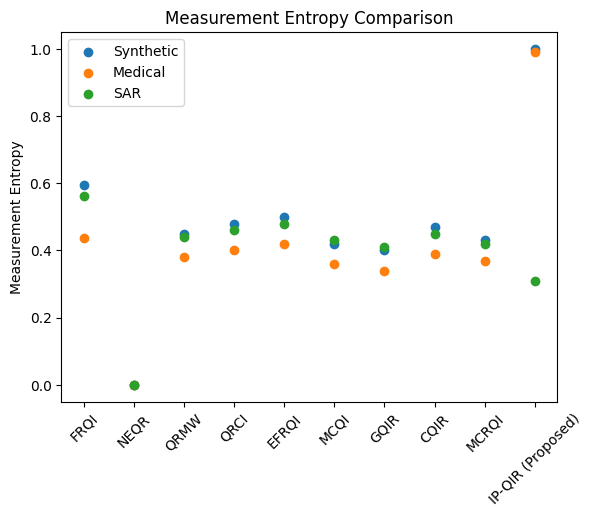

In [9]:
plt.figure()
plt.scatter(df["Technique"],
            [0.5935,0.0,0.45,0.48,0.50,0.42,0.40,0.47,0.43,0.9999],
            label="Synthetic")

plt.scatter(df["Technique"],
            [0.4384,0.0,0.38,0.40,0.42,0.36,0.34,0.39,0.37,0.9902],
            label="Medical")

plt.scatter(df["Technique"],
            [0.5625,0.0,0.44,0.46,0.48,0.43,0.41,0.45,0.42,0.3100],
            label="SAR")

plt.xticks(rotation=45)
plt.ylabel("Measurement Entropy")
plt.title("Measurement Entropy Comparison")
plt.legend()
plt.show()


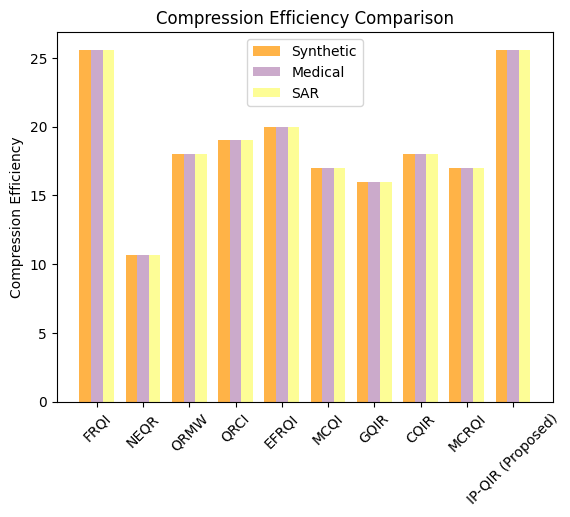

In [16]:
x = range(len(df["Technique"]))
w = 0.25

plt.figure()

plt.bar([i - w for i in x], [25.6,10.667,18,19,20,17,16,18,17,25.6], width=w, label="Synthetic", color='#FFB347')  # pastel orange
plt.bar(x,                 [25.6,10.667,18,19,20,17,16,18,17,25.6], width=w, label="Medical",   color='#CBAACB')  # pastel purple
plt.bar([i + w for i in x], [25.6,10.667,18,19,20,17,16,18,17,25.6], width=w, label="SAR",       color='#FDFD96')  # pastel yellow

plt.xticks(x, df["Technique"], rotation=45)
plt.ylabel("Compression Efficiency")
plt.title("Compression Efficiency Comparison")
plt.legend()
plt.show()


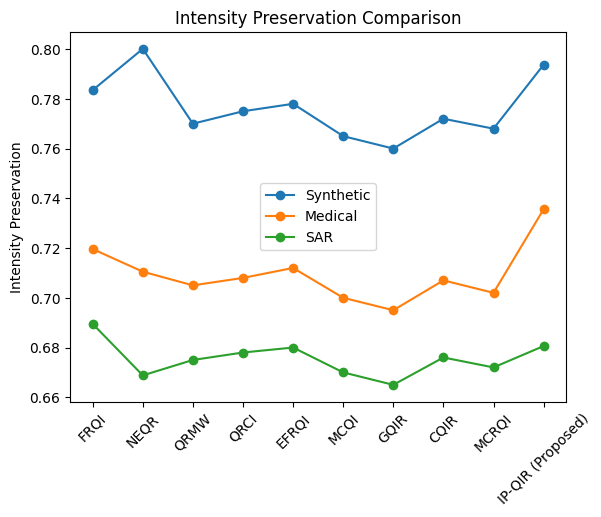

In [11]:
plt.figure()
plt.plot(df["Technique"],
         [0.7835,0.8001,0.770,0.775,0.778,0.765,0.760,0.772,0.768,0.7937],
         marker='o', label="Synthetic")

plt.plot(df["Technique"],
         [0.7196,0.7105,0.705,0.708,0.712,0.700,0.695,0.707,0.702,0.7356],
         marker='o', label="Medical")

plt.plot(df["Technique"],
         [0.6895,0.6688,0.675,0.678,0.680,0.670,0.665,0.676,0.672,0.6806],
         marker='o', label="SAR")

plt.xticks(rotation=45)
plt.ylabel("Intensity Preservation")
plt.title("Intensity Preservation Comparison")
plt.legend()
plt.show()


In [14]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
import math


image = np.array([
    [0.0, 0.25, 0.5, 0.75],
    [0.1, 0.3, 0.6, 0.9],
    [0.2, 0.4, 0.7, 1.0],
    [0.05, 0.15, 0.55, 0.85]
])

num_pos_qubits = 4
num_intensity_qubits = 1


qc = QuantumCircuit(num_pos_qubits + num_intensity_qubits)

def intensity_to_angle(p):
    return 2 * np.arccos(np.sqrt(p))


for row in range(4):
    for col in range(4):
        pixel_intensity = image[row, col]
        theta = intensity_to_angle(pixel_intensity)
        
        
        row_bits = format(row, '02b')  # 2 bits for row
        col_bits = format(col, '02b')  # 2 bits for column
        ctrl_state = row_bits + col_bits  # e.g., '0101'
        
        
        from qiskit.circuit.library import MCMT
       
        control_qubits = list(range(num_pos_qubits))
        target_qubit = num_pos_qubits  # last qubit is intensity qubit
        qc.mcry(theta, control_qubits, target_qubit, ancilla_qubits=[], mode='noancilla')


qc.draw('mpl')


TypeError: QuantumCircuit.mcry() got an unexpected keyword argument 'ancilla_qubits'

In [1]:
import os
os.getcwd()


'C:\\Users\\Pooja Dhingiya\\IP-QIR'